 # Tarea # 5
 ### Imports

In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import prince
import scipy.stats
import os

# ## Ejercicio # 1
# a) Cargar la tabla

In [129]:
#os.getcwd()
os.chdir(r'c:\\Users\\jmc\\Documents\\Ciencia de datos con Python\\ciencia-de-datos\\Unidad N. 5')
datos = pd.read_csv('datos\\Titanic.csv')

 b) Recodifique las variables cualitativas

In [130]:
def recodificar(col, nuevo_codigo):
  col_cod = pd.Series(col, copy=True)
  for llave, valor in nuevo_codigo.items():
    col_cod.replace(llave, valor, inplace=True)
  return col_cod

datos["Survived"] = recodificar(datos["Survived"], {0 : "Si", 1: "No"})

datos["Pclass"] = recodificar(datos["Pclass"], {1 : "primera", 2: "segunda", 3 : "tercera"})

print(datos.head())


   PassengerId Survived   Pclass  \
0            1       Si  tercera   
1            2       No  primera   
2            3       No  tercera   
3            4       No  primera   
4            5       Si  tercera   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


 c) Estadisticas basicas

 **Describe()**

In [131]:
del datos['PassengerId']
print(datos.dropna().describe())

              Age       SibSp       Parch        Fare
count  270.000000  270.000000  270.000000  270.000000
mean    36.825630    0.507407    0.477778   84.942193
std     15.569971    0.643773    0.788784   80.698651
min      0.920000    0.000000    0.000000    0.000000
25%     25.000000    0.000000    0.000000   30.000000
50%     36.000000    0.000000    0.000000   60.587500
75%     48.000000    1.000000    1.000000  103.193750
max     80.000000    3.000000    4.000000  512.329200


 **Conteo de variables categoricas**

In [132]:
survived = pd.crosstab(index=datos["Survived"],columns="count")
pClass = pd.crosstab(index=datos["Pclass"],columns="count")
sex = pd.crosstab(index=datos["Sex"],columns="count")
embarked = pd.crosstab(index=datos["Embarked"],columns="count")

print(survived)
print("\n")
print(pClass)
print("\n")
print(sex)
print("\n")
print(embarked)


col_0     count
Survived       
No          492
Si          815


col_0    count
Pclass        
primera    321
segunda    277
tercera    709


col_0   count
Sex          
female    464
male      843


col_0     count
Embarked       
C           270
Q           123
S           914


 **Media de datos numericos**

In [133]:
print(datos.mean(numeric_only=True))

Age      29.842596
SibSp     0.499617
Parch     0.385616
Fare     33.223956
dtype: float64


 **Mediana de datos numericos**

In [134]:
print(datos.median(numeric_only=True))

Age      28.0000
SibSp     0.0000
Parch     0.0000
Fare     14.4542
dtype: float64


 **Desviacion Estandar de datos numericos**

In [135]:
print(datos.std(numeric_only=True))

Age      14.390739
SibSp     1.042273
Parch     0.866092
Fare     51.765986
dtype: float64


 **Maximos de datos numericos**

In [136]:
print(datos.max(numeric_only=True))

Age       80.0000
SibSp      8.0000
Parch      9.0000
Fare     512.3292
dtype: float64


 **Percentiles de datos numericos**

In [137]:
print(datos.quantile(np.array([0,.25,.50,.75,1])))


        Age  SibSp  Parch      Fare
0.00   0.17    0.0    0.0    0.0000
0.25  21.00    0.0    0.0    7.8958
0.50  28.00    0.0    0.0   14.4542
0.75  39.00    1.0    0.0   31.2750
1.00  80.00    8.0    9.0  512.3292


 d) Grafico de barras para determinar distribucion de variables categoricas
 **Survided**

([<matplotlib.axis.XTick at 0x229ec31be48>,
 <a list of 2 Text xticklabel objects>)

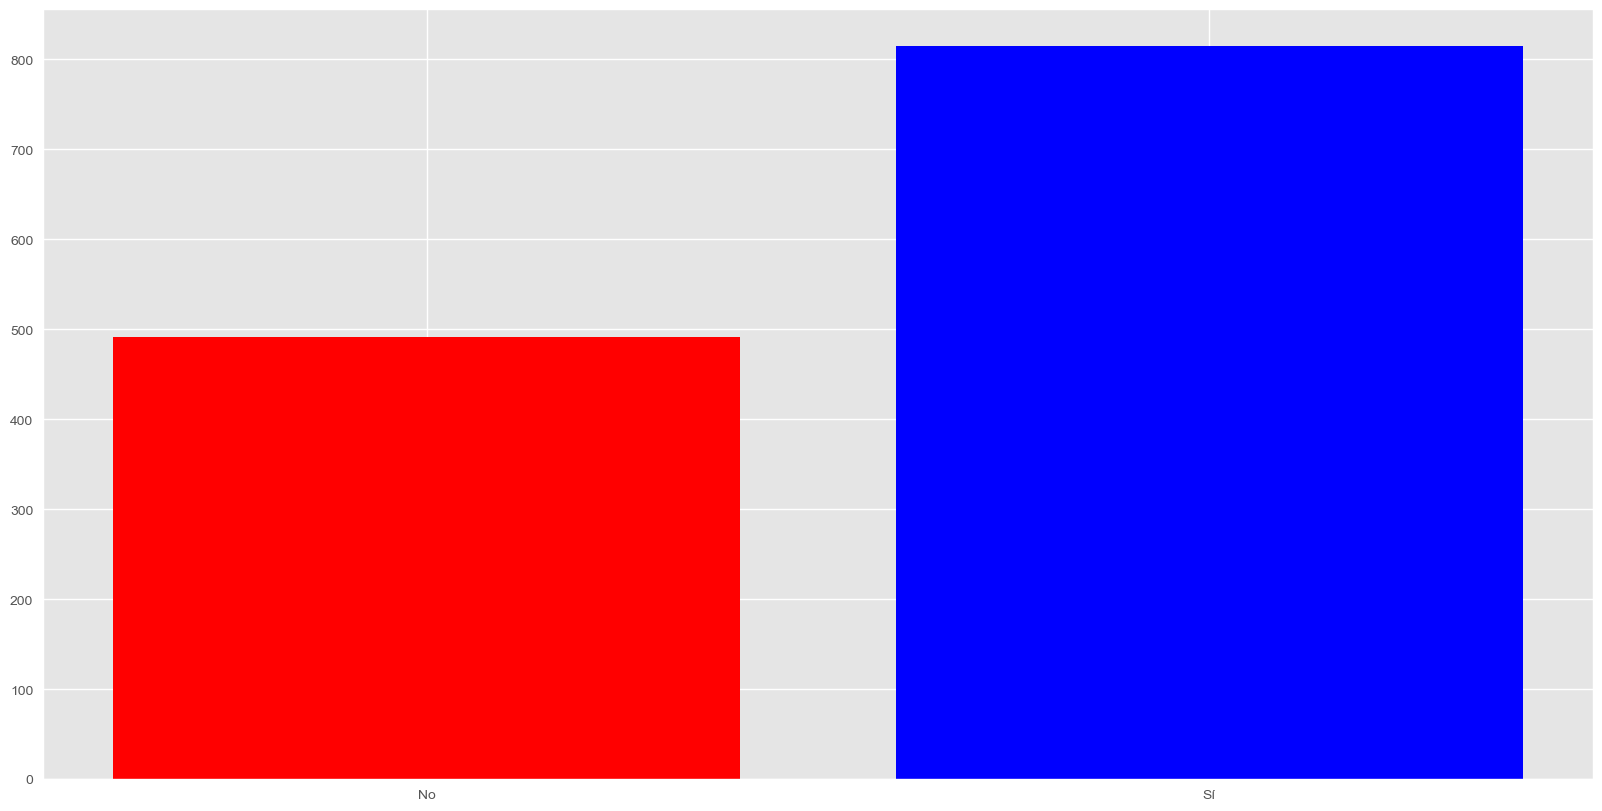

In [138]:
# Tamano del plot
plt.rcParams["figure.figsize"] = [20, 10]

plt.style.use('ggplot')
# Altura de la barra
alto = [survived['count'][0], survived['count'][1]]

# definicion de las barras
barras = ('No', 'Sí')

# Posicion de las barras en eje x
y_pos = np.arange(len(barras))

plt.bar(y_pos, alto, color=['red','blue'])
plt.xticks(y_pos, barras)


 **Passenger Class**

([<matplotlib.axis.XTick at 0x229ec52f630>,
 <a list of 3 Text xticklabel objects>)

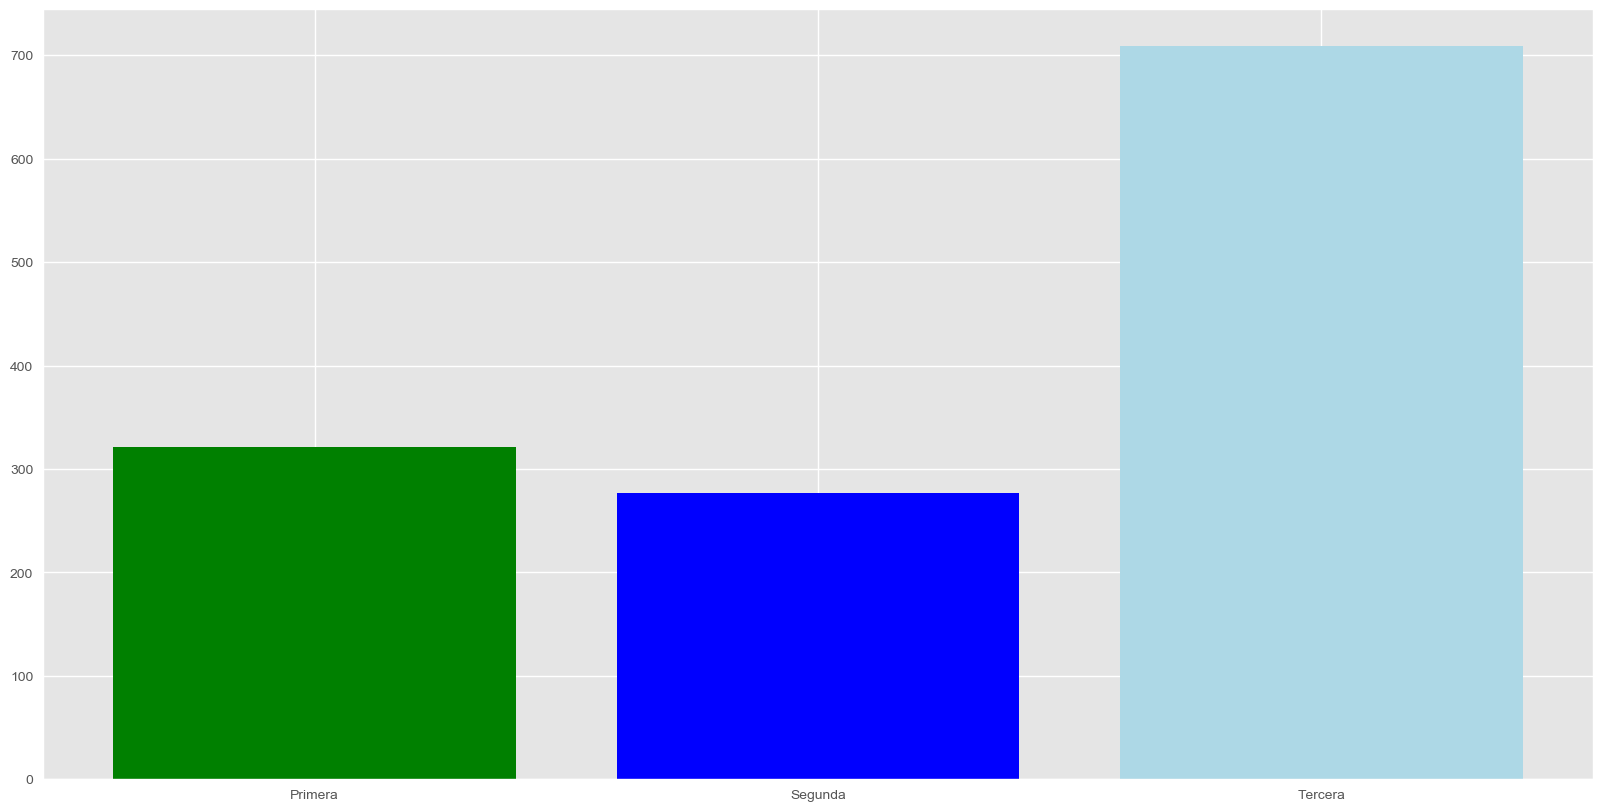

In [139]:
alto = [pClass['count'][0], pClass['count'][1], pClass['count'][2]]
barras = ('Primera', 'Segunda', 'Tercera')
y_pos = np.arange(len(barras))
plt.bar(y_pos, alto, color=['green', 'blue', 'lightblue'])
plt.xticks(y_pos, barras)


 **Sex**

([<matplotlib.axis.XTick at 0x229ec511c18>,
 <a list of 2 Text xticklabel objects>)

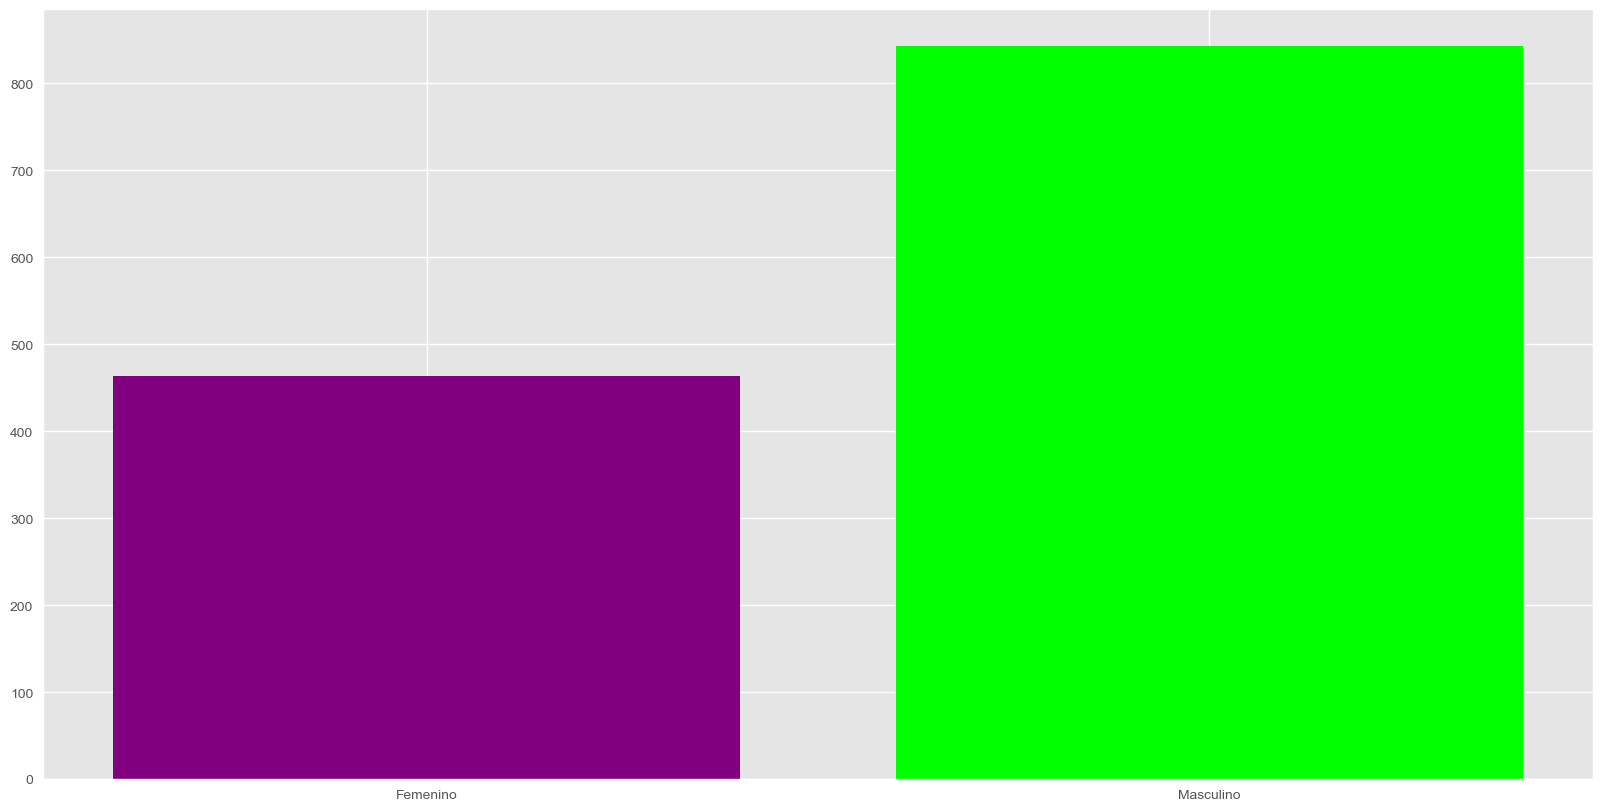

In [140]:
alto = [sex['count'][0], sex['count'][1]]
barras = ('Femenino', 'Masculino')
y_pos = np.arange(len(barras))
plt.bar(y_pos, alto, color=['purple', 'lime'])
plt.xticks(y_pos, barras)


 **Embarked Port**

([<matplotlib.axis.XTick at 0x229ec32c5c0>,
 <a list of 3 Text xticklabel objects>)

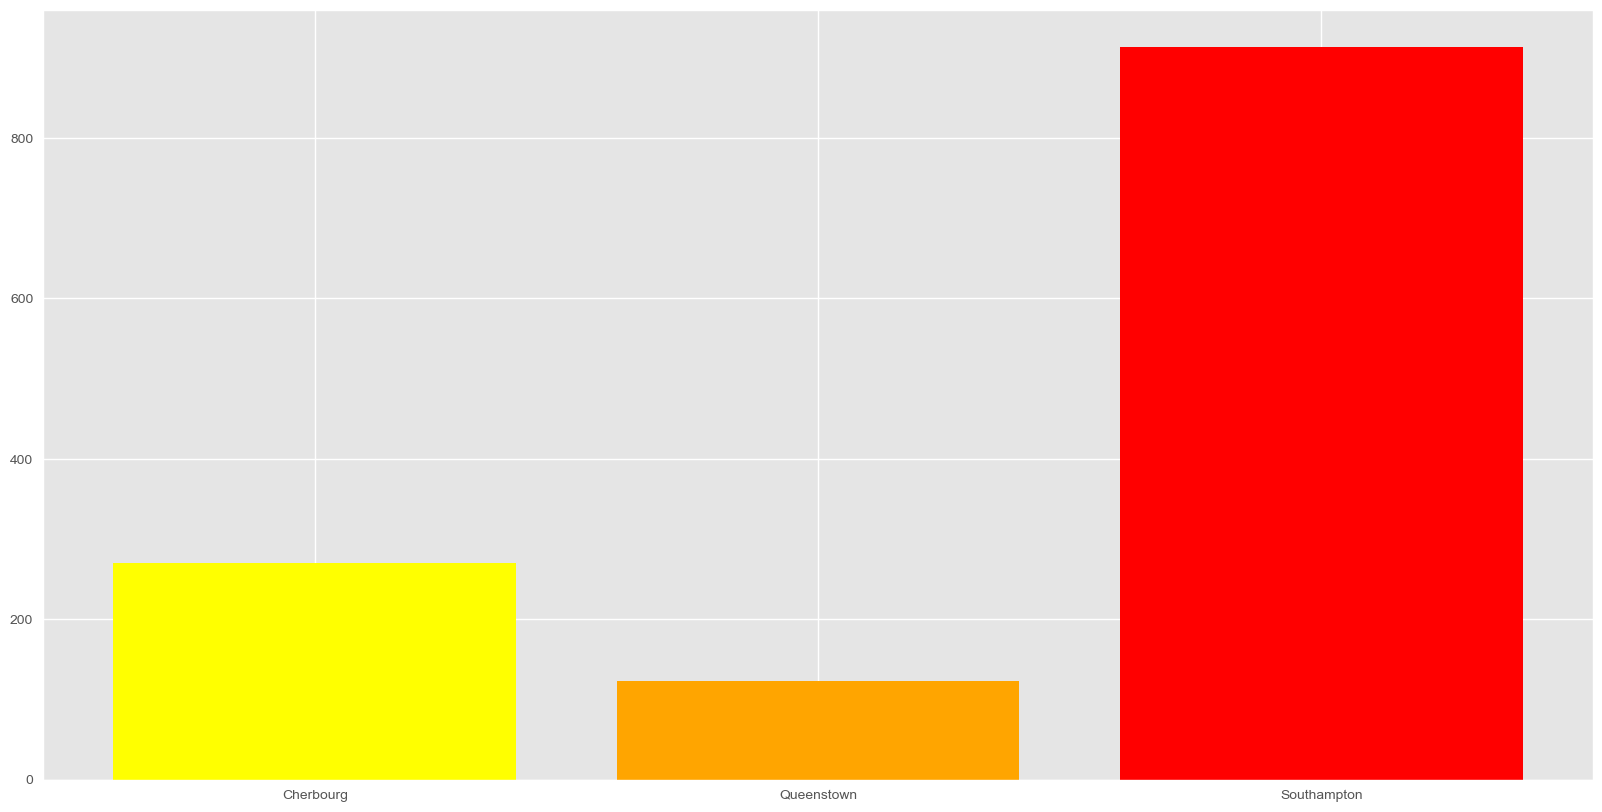

In [141]:

alto = [embarked['count'][0], embarked['count'][1], embarked['count'][2]]
barras = ('Cherbourg', 'Queenstown', 'Southampton')
y_pos = np.arange(len(barras))
plt.bar(y_pos, alto, color=['yellow', 'orange', 'red'])
plt.xticks(y_pos, barras)


 e) Boxplot, datos atipicos

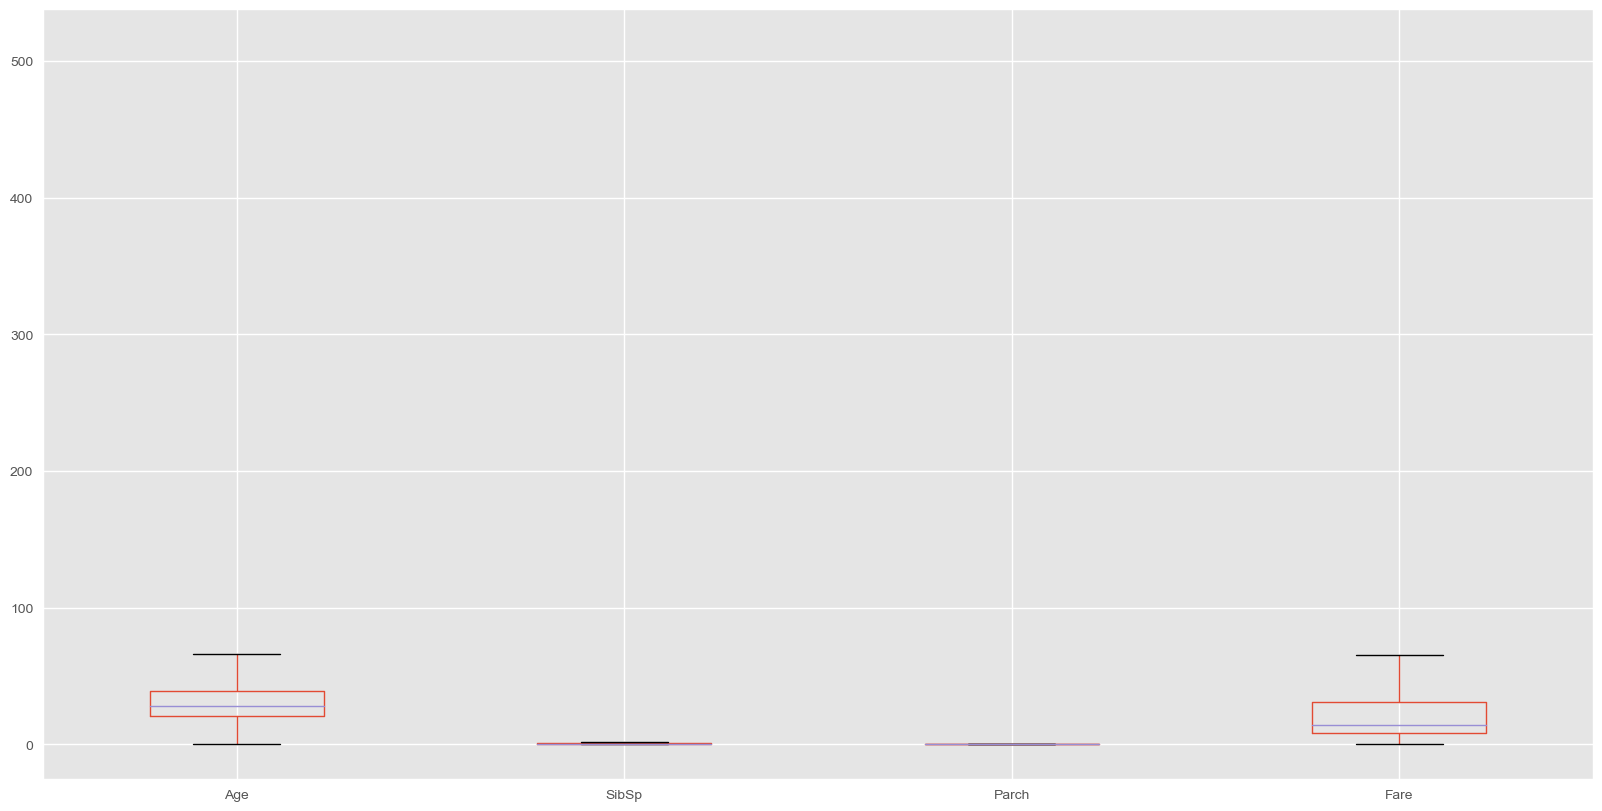

In [142]:
boxplots = datos.boxplot(return_type='axes')

 f) Graficos de densidad, histogramas y tests de normalidad
 **Densidad, Edad**

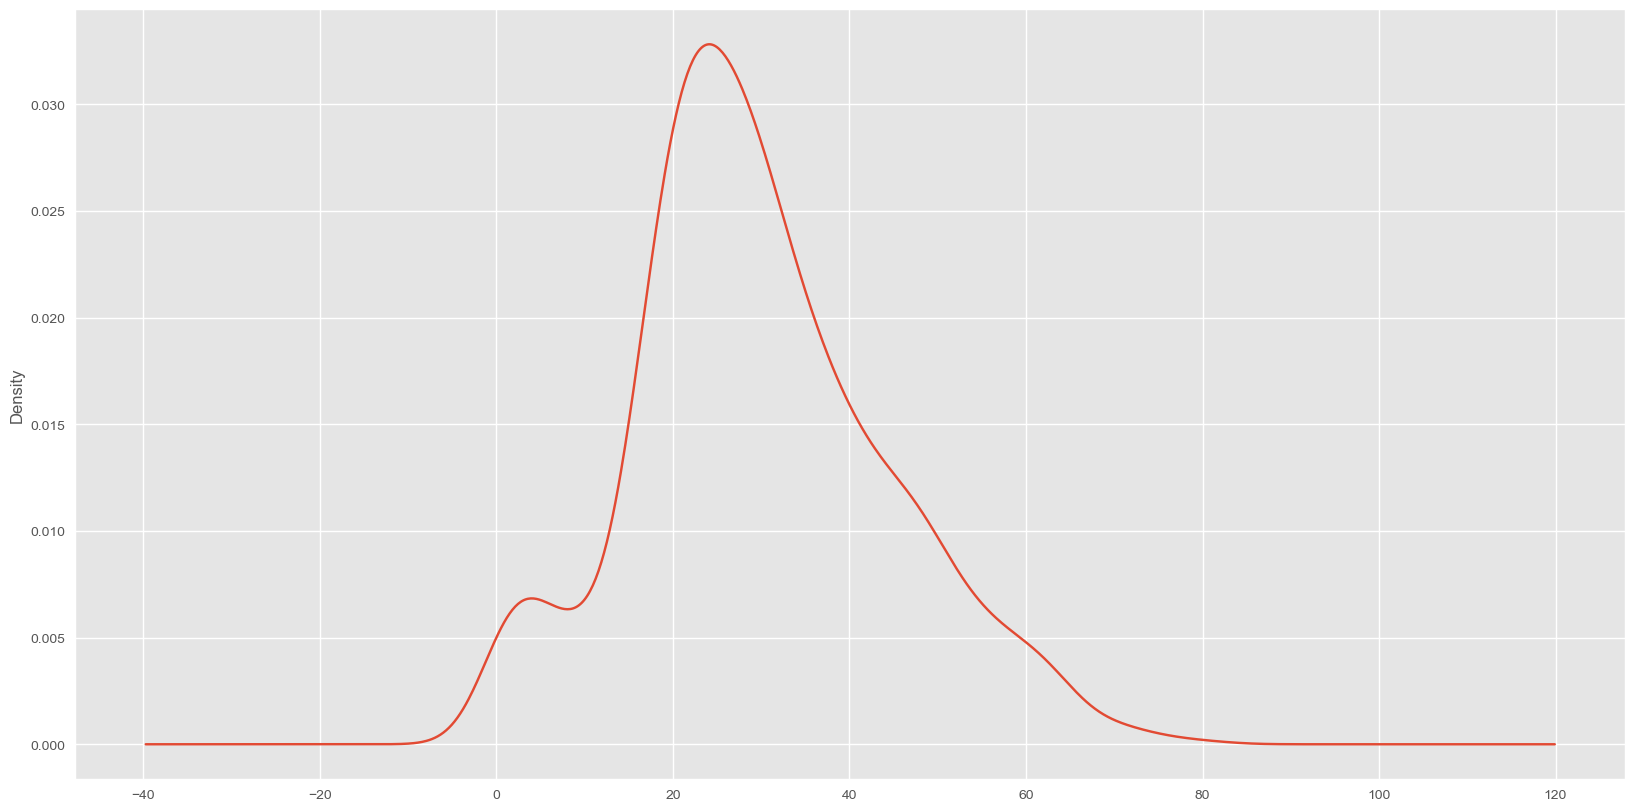

In [143]:
densidad = datos['Age'].plot(kind='density')

 **Densidad, Parentezco**

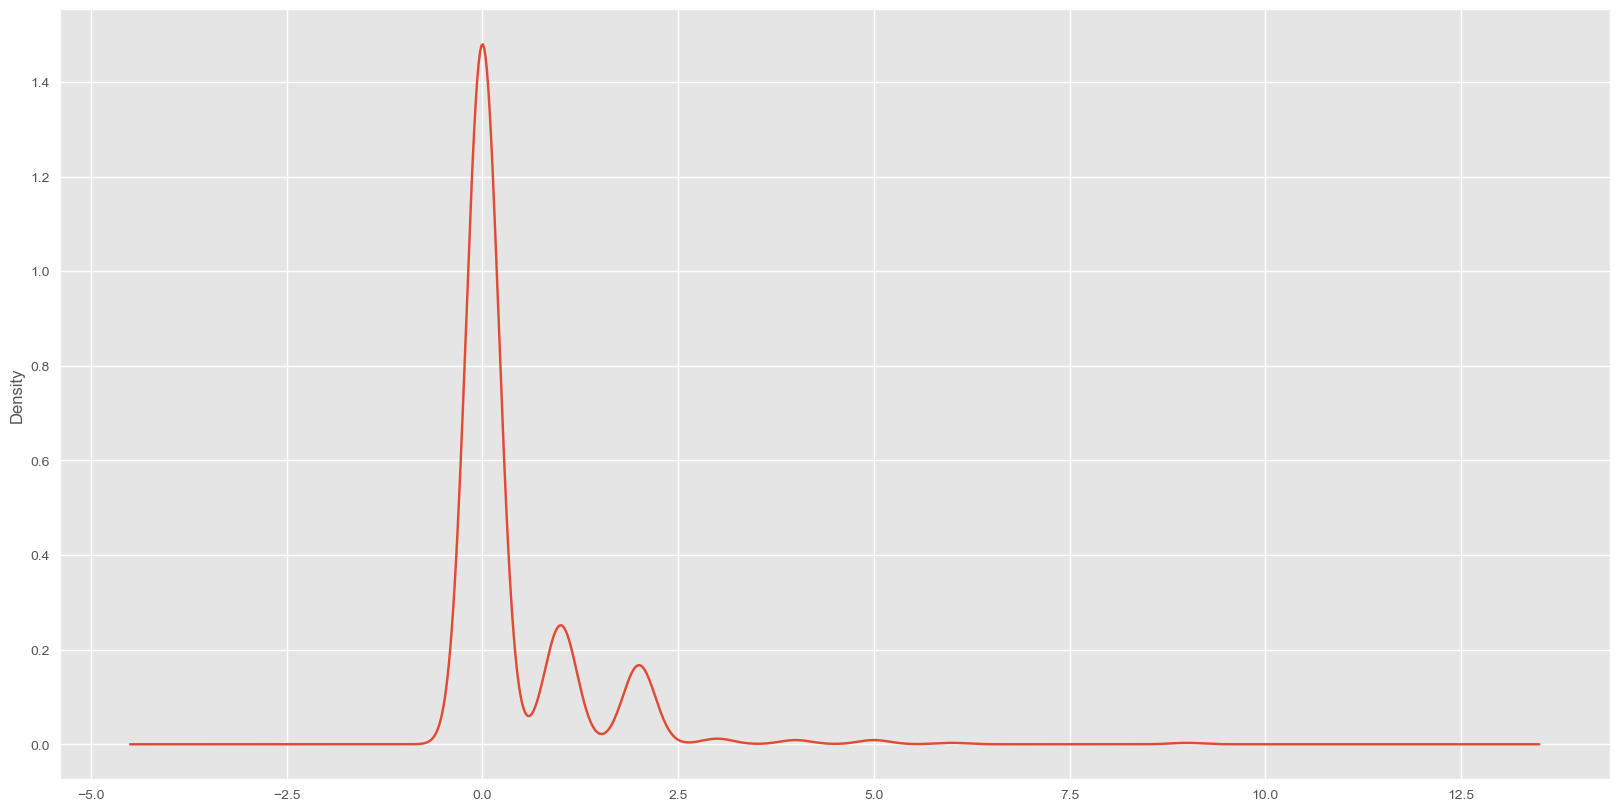

In [144]:
densidad = datos['Parch'].plot(kind='density')

 **Densidad, Tarifa**

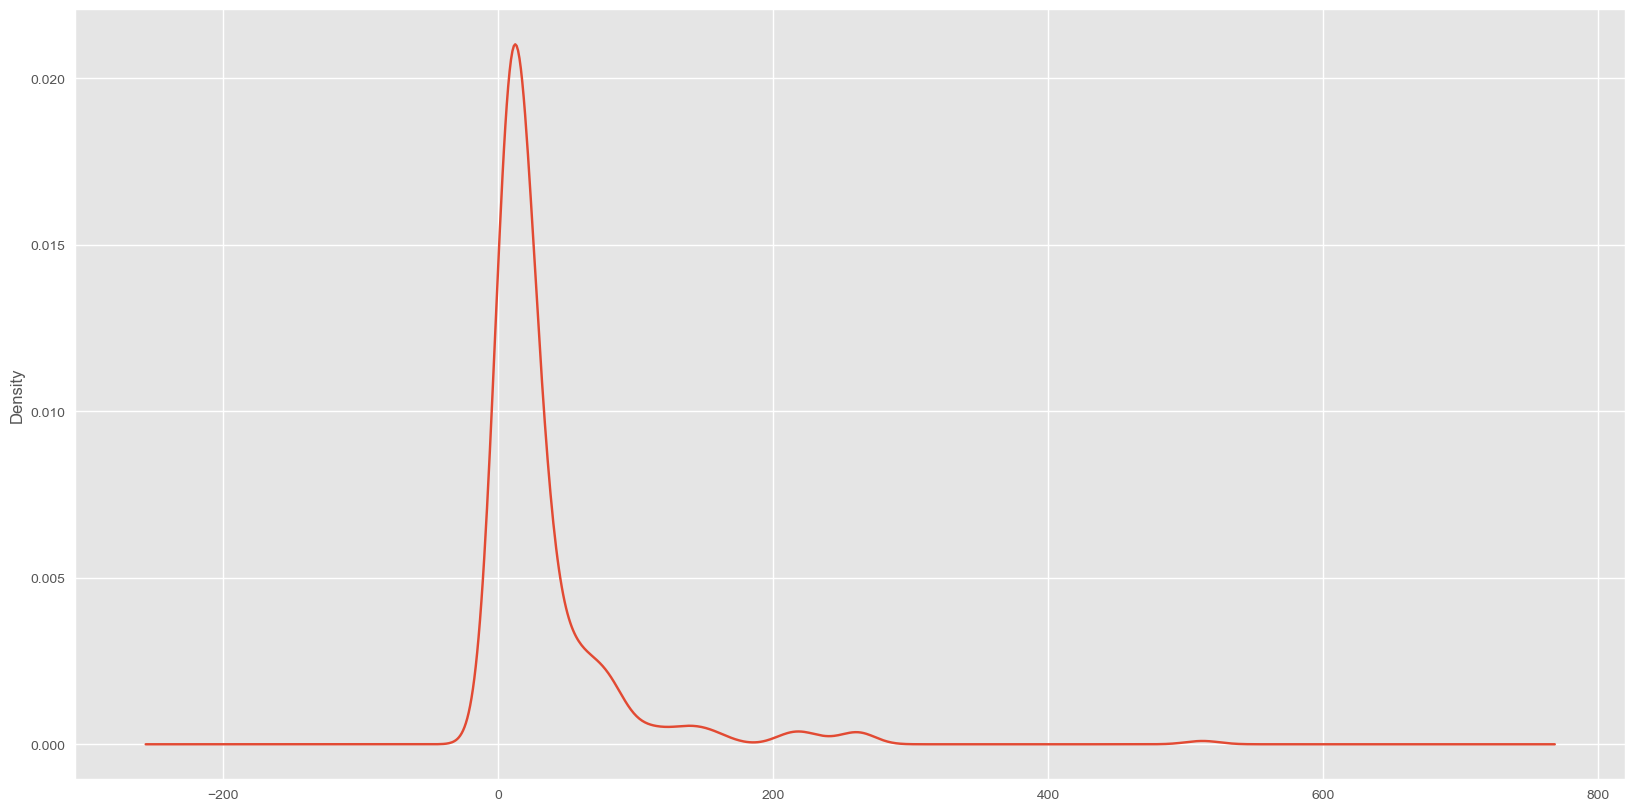

In [145]:
densidad = datos['Fare'].plot(kind='density')


 **Densidad, hermanos o conyuges**

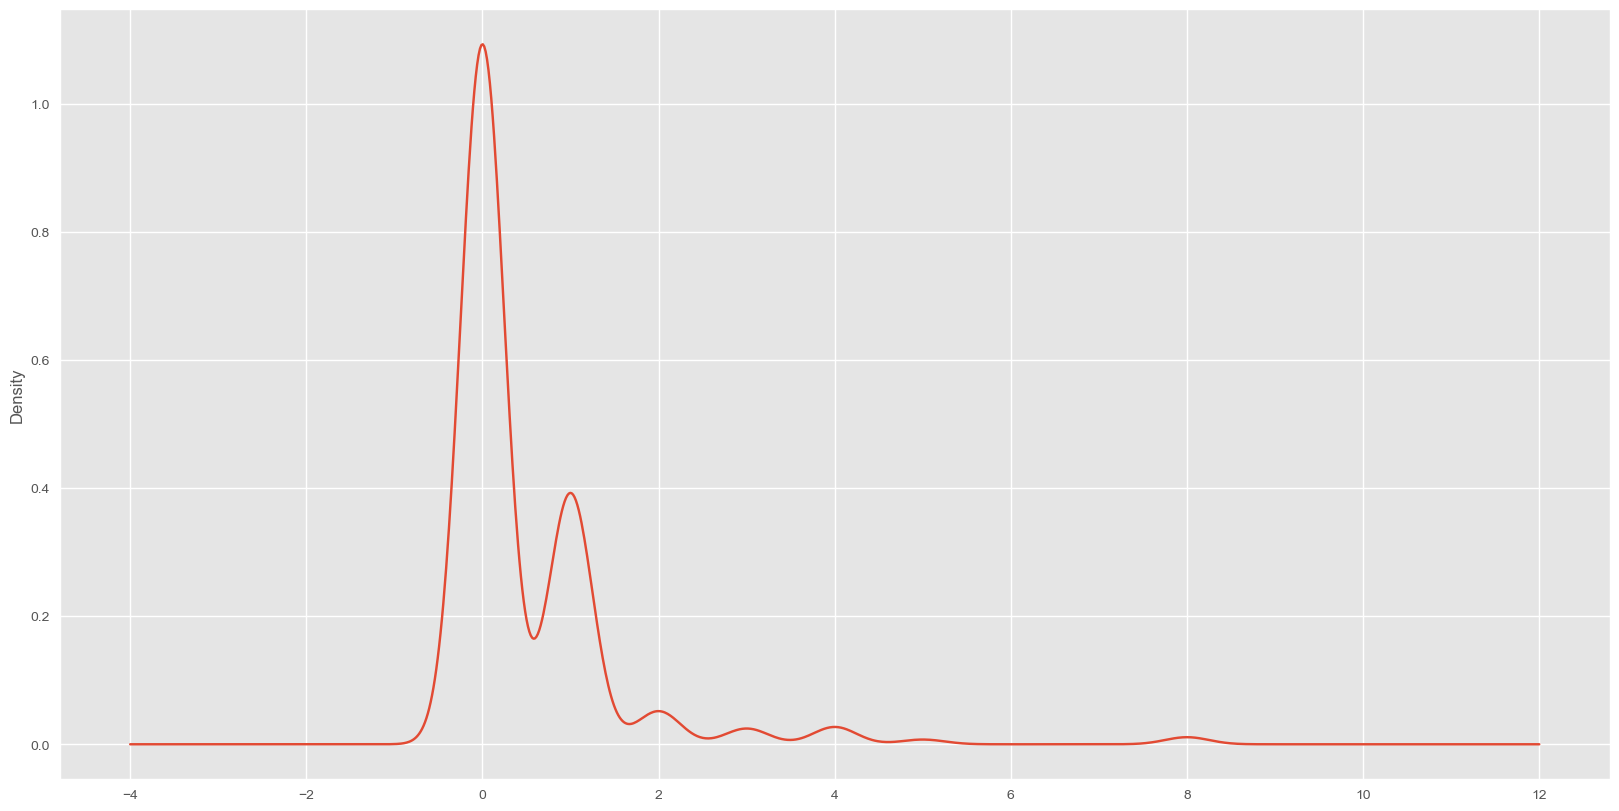

In [146]:
densidad = datos['SibSp'].plot(kind='density')


 **Histograma, Edad**

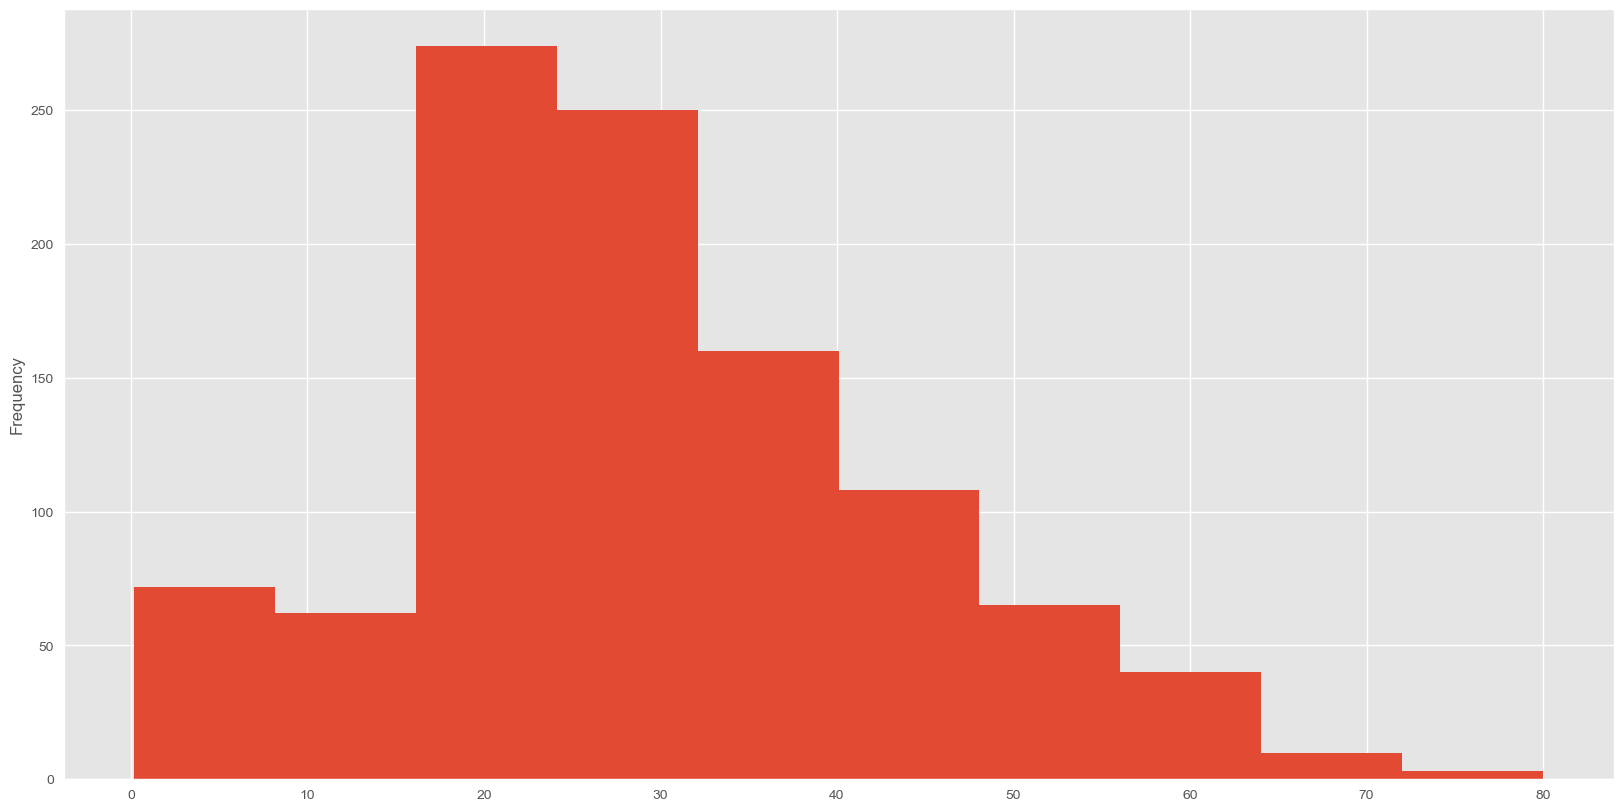

In [147]:
densidad = datos['Age'].plot(kind='hist')


 **Histograma, Tarifa**

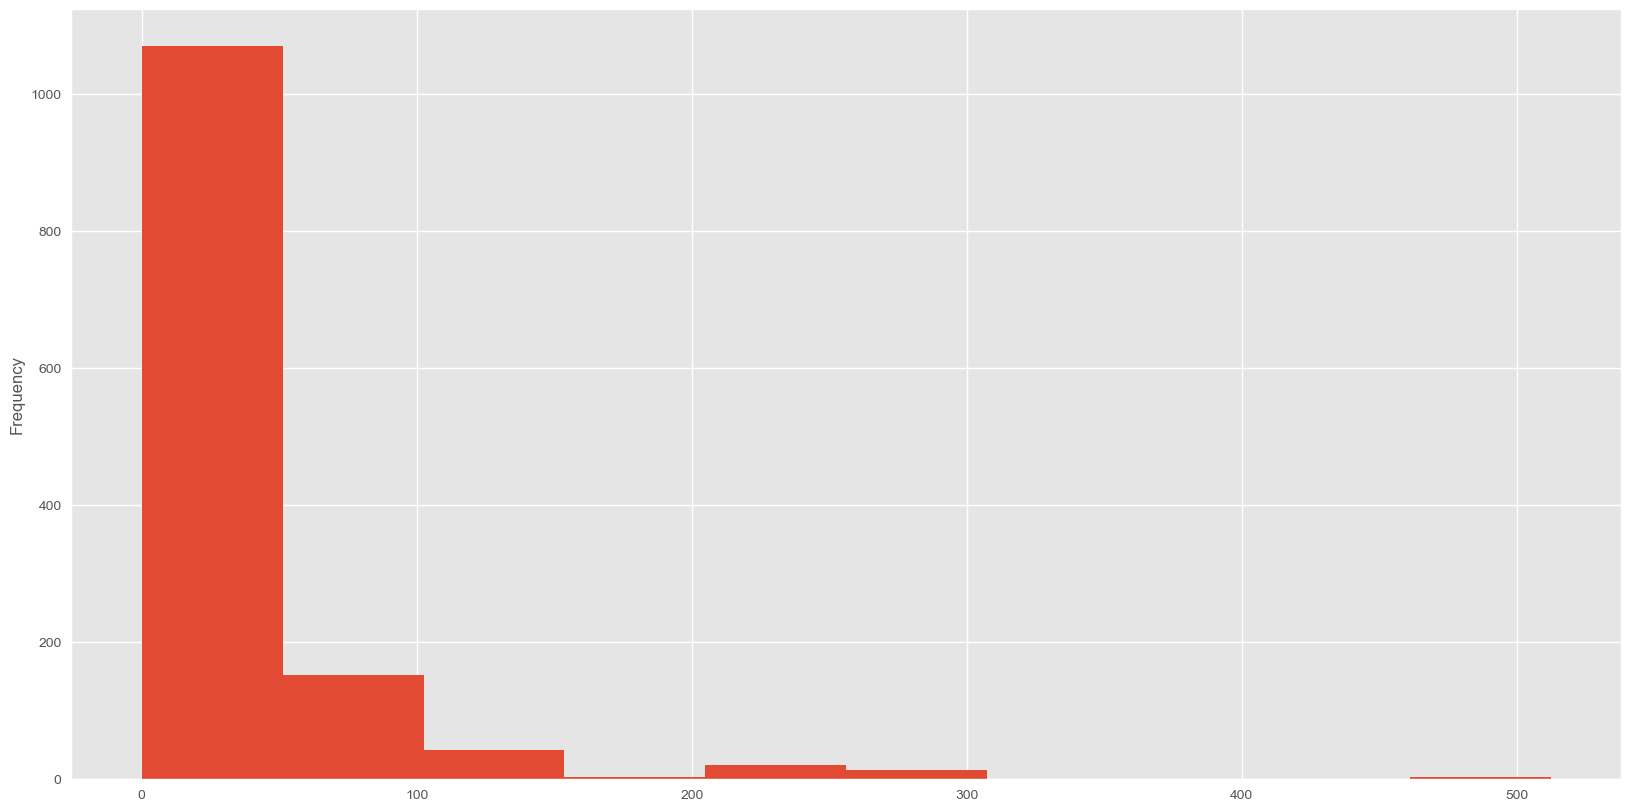

In [148]:
densidad = datos['Fare'].plot(kind='hist')


 ***Tests de Normalidad***

 ** Test de Shapiro-Wilk, Edad**

In [149]:
shapiro = scipy.stats.shapiro(datos.dropna()['Age'])
print(shapiro)

(0.9913878440856934, 0.1151111051440239)


In [150]:
Test_Estadistico = shapiro[0]
print(Test_Estadistico)

0.9913878440856934


In [151]:
p_value = shapiro[1]
print(p_value)

0.1151111051440239


In [152]:
print(p_value < Test_Estadistico)


True


 ** Test de Shapiro-Wilk, Parentezco**

In [153]:
shapiro = scipy.stats.shapiro(datos.dropna()['Parch'])
print(shapiro)

(0.6471765041351318, 2.7906137537923304e-23)


In [154]:
Test_Estadistico = shapiro[0]
print(Test_Estadistico)

0.6471765041351318


In [155]:
p_value = shapiro[1]
print(p_value)

2.7906137537923304e-23


In [156]:
print(p_value < Test_Estadistico)


True


 g) Scatter plots y grafico de todas las variables 2 a 2
 ** Scatter plot Edad vs Tarifa,

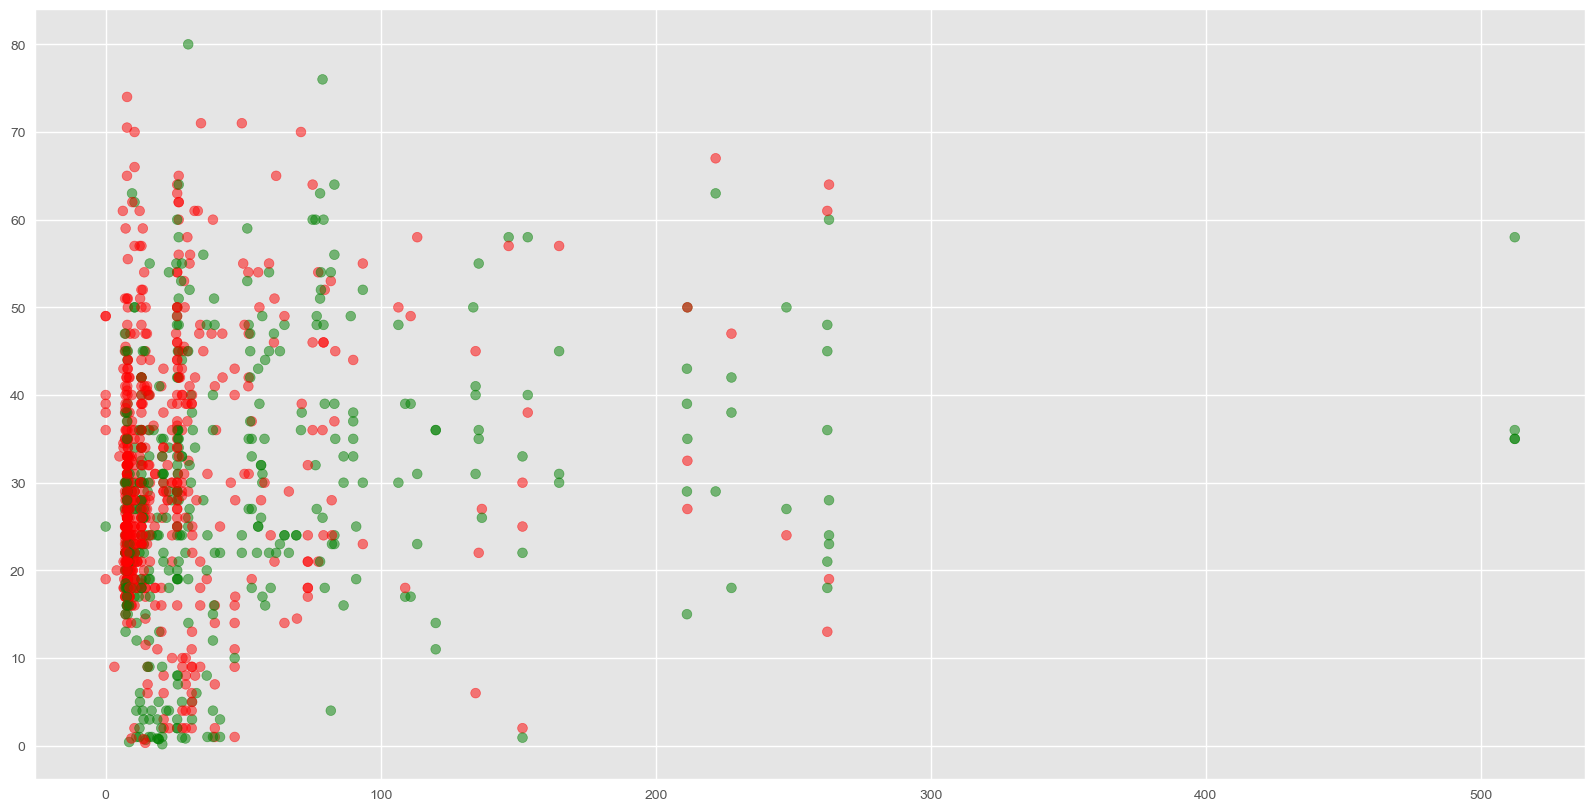

In [157]:
x = datos['Fare']
y = datos['Age']
colores = recodificar(datos["Survived"], {"Si" : "red", "No": "green"})
plt.scatter(x, y, alpha=0.5, c=colores, cmap='viridis')



 ** Scatter plot Edad vs Parentezco

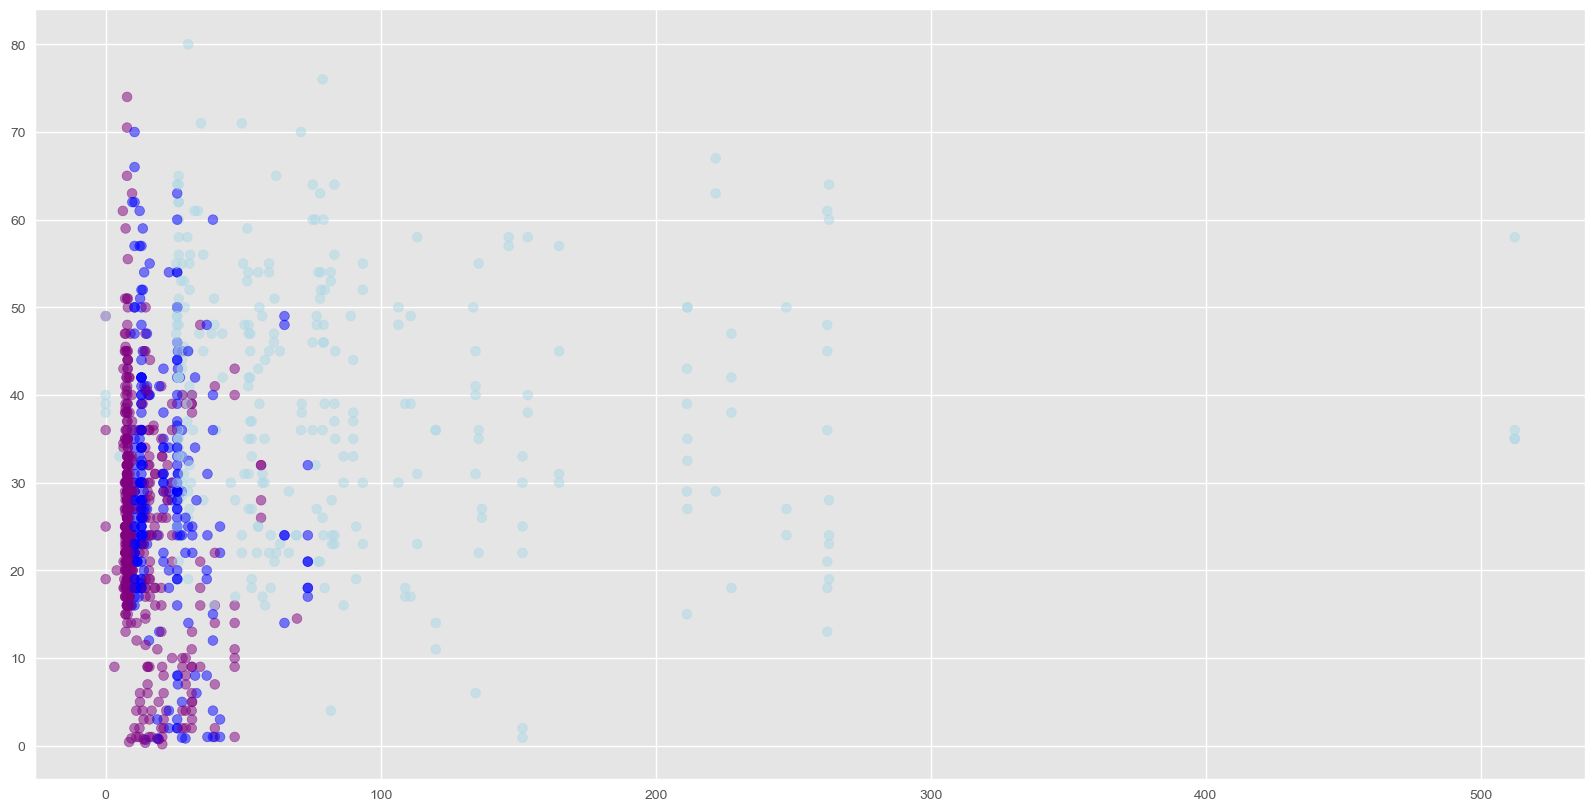

In [158]:
x = datos['Fare']
y = datos['Age']
colores = recodificar(datos["Pclass"], {"primera" : "lightblue", "segunda" : "blue", "tercera": "purple"})
plt.scatter(x, y,  alpha=0.5, c=colores, cmap='viridis')


 **  grafico de todas las variables 2 a 2

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * 

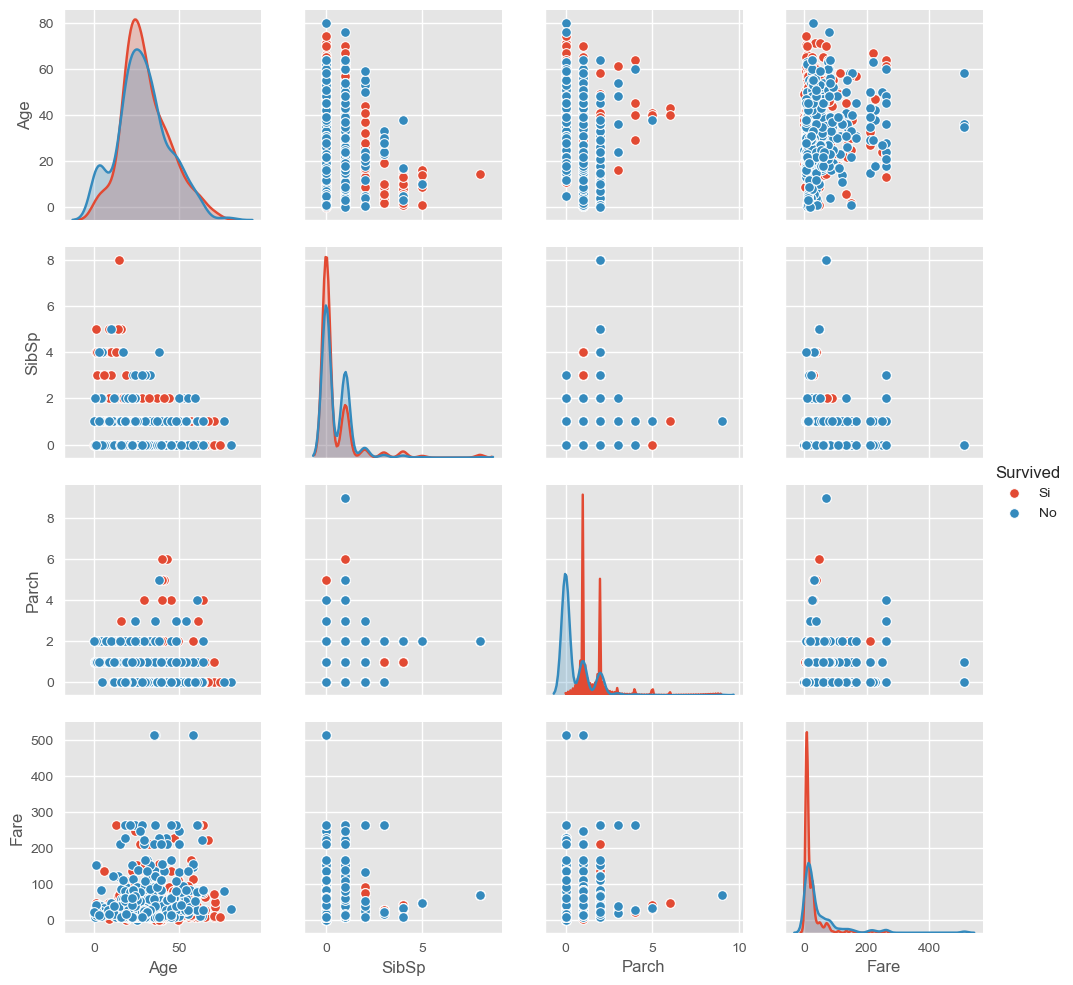

In [159]:
corrplot = sns.pairplot(datos, hue='Survived', size=2.5)


 ** Matriz de correlaciones

In [160]:
corr = datos.corr()
print(corr)


            Age     SibSp     Parch      Fare
Age    1.000000 -0.242910 -0.149992  0.177206
SibSp -0.242910  1.000000  0.373383  0.161030
Parch -0.149992  0.373383  1.000000  0.222327
Fare   0.177206  0.161030  0.222327  1.000000


 ** Grafico de correlaciones

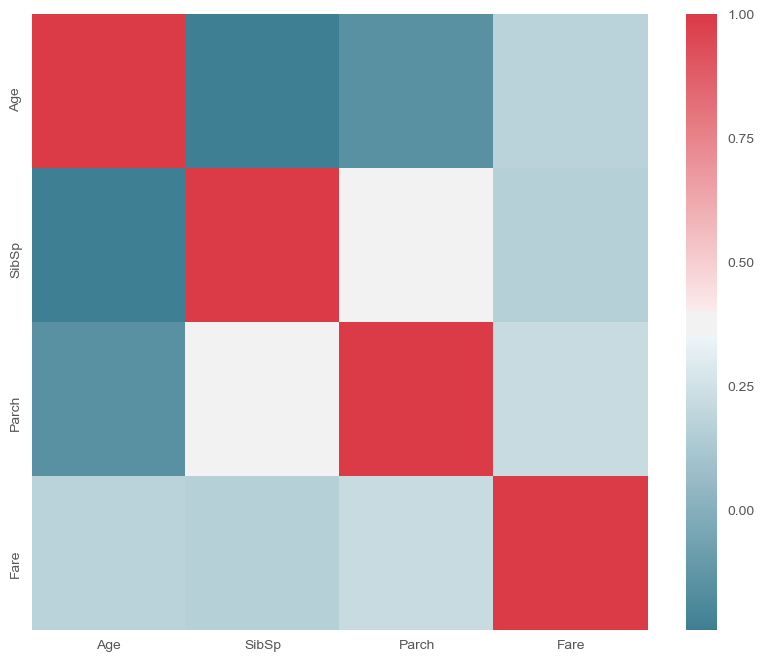

In [161]:
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

 ### Ejercicio #2

In [162]:
datos = pd.read_csv('datos\\SAheart.csv', ";")

 b) Recodifique las variables cualitativas

In [163]:
print(datos.head())


   sbp  tobacco   ldl  adiposity  famhist  typea  obesity  alcohol  age chd
0  160    12.00  5.73      23.11  Present     49    25.30    97.20   52  Si
1  144     0.01  4.41      28.61   Absent     55    28.87     2.06   63  Si
2  118     0.08  3.48      32.28  Present     52    29.14     3.81   46  No
3  170     7.50  6.41      38.03  Present     51    31.99    24.26   58  Si
4  134    13.60  3.50      27.78  Present     60    25.99    57.34   49  Si


 c) Estadisticas basicas

 **Describe()**

In [164]:
print(datos.dropna().describe())

              sbp     tobacco         ldl   adiposity       typea     obesity  \
count  462.000000  462.000000  462.000000  462.000000  462.000000  462.000000   
mean   138.326840    3.635649    4.740325   25.406732   53.103896   26.044113   
std     20.496317    4.593024    2.070909    7.780699    9.817534    4.213680   
min    101.000000    0.000000    0.980000    6.740000   13.000000   14.700000   
25%    124.000000    0.052500    3.282500   19.775000   47.000000   22.985000   
50%    134.000000    2.000000    4.340000   26.115000   53.000000   25.805000   
75%    148.000000    5.500000    5.790000   31.227500   60.000000   28.497500   
max    218.000000   31.200000   15.330000   42.490000   78.000000   46.580000   

          alcohol         age  
count  462.000000  462.000000  
mean    17.044394   42.816017  
std     24.481059   14.608956  
min      0.000000   15.000000  
25%      0.510000   31.000000  
50%      7.510000   45.000000  
75%     23.892500   55.000000  
max    147.190

 **Conteo de variables categoricas**

In [165]:
famHist = pd.crosstab(index=datos["famhist"],columns="count")
chd = pd.crosstab(index=datos["chd"],columns="count")

print(famHist)
print("\n")
print(chd)


col_0    count
famhist       
Absent     270
Present    192


col_0  count
chd         
No       302
Si       160


 **Media de datos numericos**

In [166]:
print(datos.mean(numeric_only=True))

sbp          138.326840
tobacco        3.635649
ldl            4.740325
adiposity     25.406732
typea         53.103896
obesity       26.044113
alcohol       17.044394
age           42.816017
dtype: float64


 **Mediana de datos numericos**

In [167]:
print(datos.median(numeric_only=True))

sbp          134.000
tobacco        2.000
ldl            4.340
adiposity     26.115
typea         53.000
obesity       25.805
alcohol        7.510
age           45.000
dtype: float64


 **Desviacion Estandar de datos numericos**

In [168]:
print(datos.std(numeric_only=True))

sbp          20.496317
tobacco       4.593024
ldl           2.070909
adiposity     7.780699
typea         9.817534
obesity       4.213680
alcohol      24.481059
age          14.608956
dtype: float64


 **Maximos de datos numericos**

In [169]:
print(datos.max(numeric_only=True))

sbp          218.00
tobacco       31.20
ldl           15.33
adiposity     42.49
typea         78.00
obesity       46.58
alcohol      147.19
age           64.00
dtype: float64


 **Percentiles de datos numericos**

In [170]:
print(datos.quantile(np.array([0,.25,.50,.75,1])))


        sbp  tobacco      ldl  adiposity  typea  obesity   alcohol   age
0.00  101.0   0.0000   0.9800     6.7400   13.0  14.7000    0.0000  15.0
0.25  124.0   0.0525   3.2825    19.7750   47.0  22.9850    0.5100  31.0
0.50  134.0   2.0000   4.3400    26.1150   53.0  25.8050    7.5100  45.0
0.75  148.0   5.5000   5.7900    31.2275   60.0  28.4975   23.8925  55.0
1.00  218.0  31.2000  15.3300    42.4900   78.0  46.5800  147.1900  64.0


 d) Grafico de barras para determinar distribucion de variables categoricas
 **Historia Familiar**

([<matplotlib.axis.XTick at 0x229ee39abe0>,
 <a list of 2 Text xticklabel objects>)

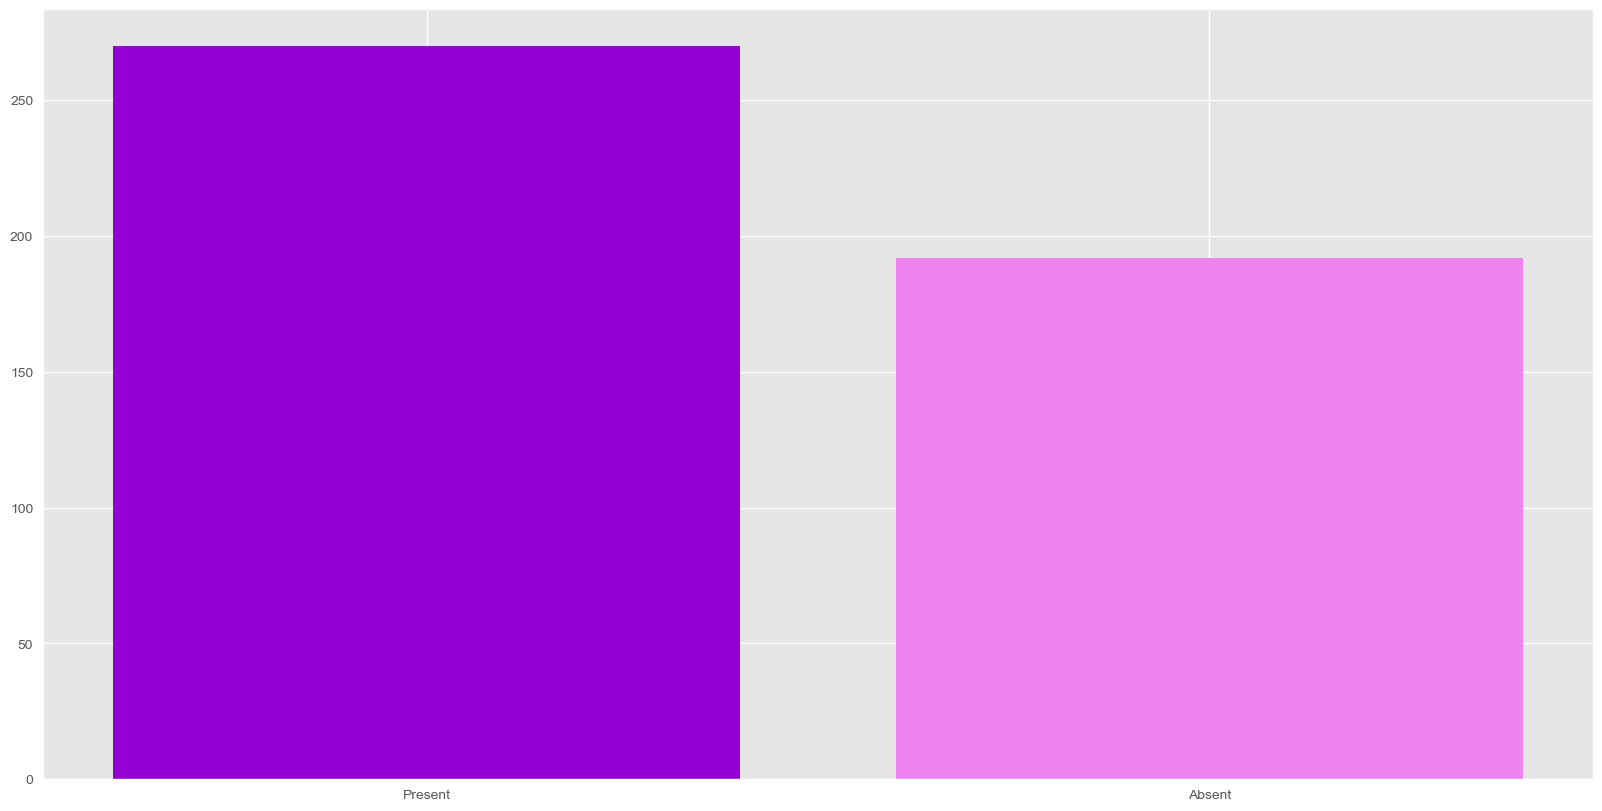

In [171]:
plt.rcParams["figure.figsize"] = [20, 10]

plt.style.use('ggplot')
alto = [famHist['count'][0], famHist['count'][1]]
barras = ('Present', 'Absent')
y_pos = np.arange(len(barras))

plt.bar(y_pos, alto, color=['darkviolet','violet'])
plt.xticks(y_pos, barras)


 **Enfermedad cardıaca coronaria**

([<matplotlib.axis.XTick at 0x229ee3eac18>,
 <a list of 2 Text xticklabel objects>)

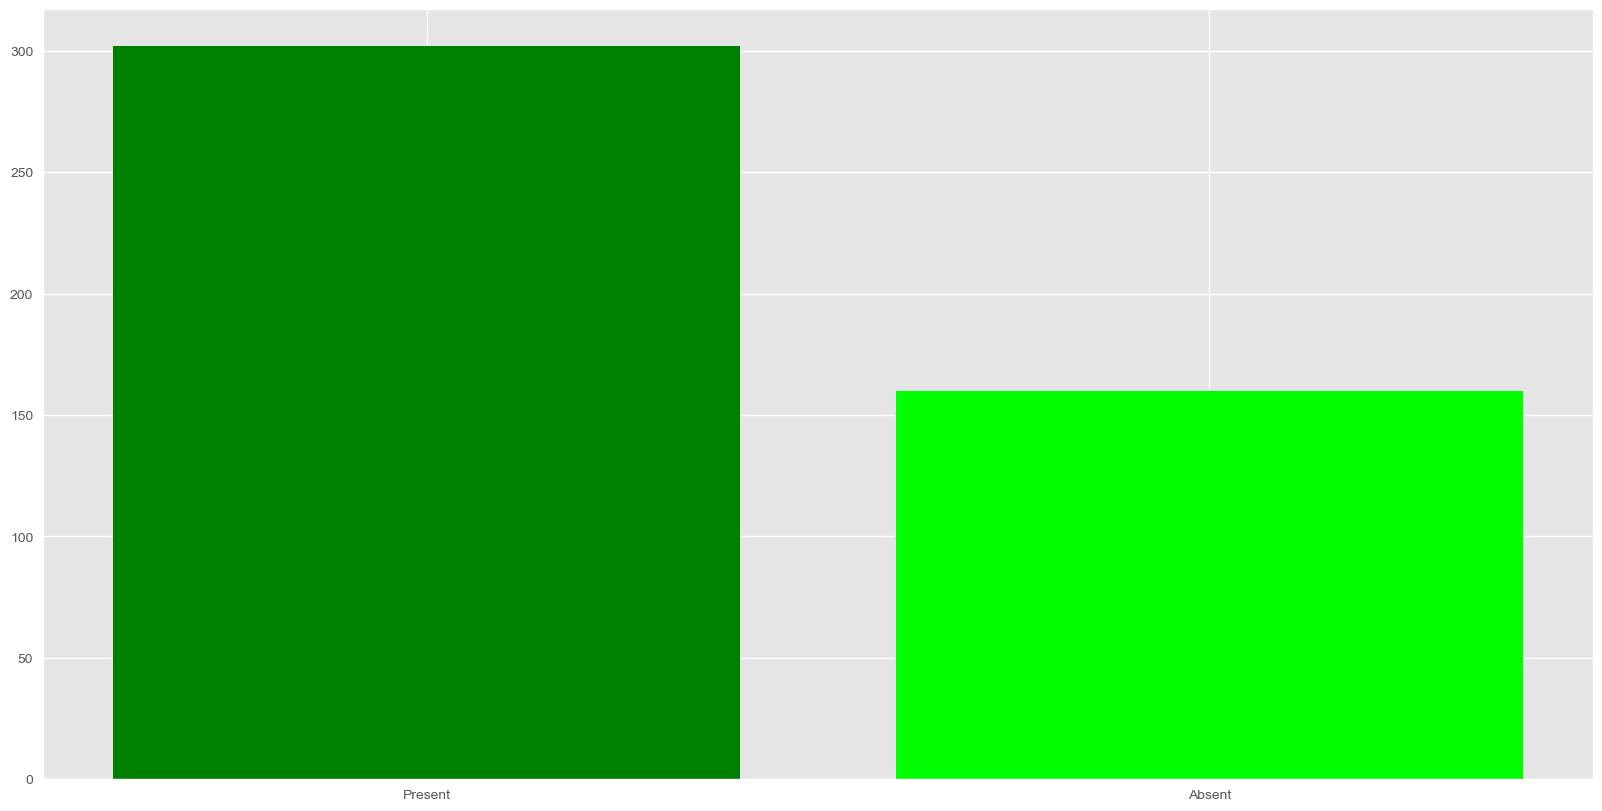

In [172]:
alto = [chd['count'][0], chd['count'][1]]
barras = ('Present', 'Absent')
y_pos = np.arange(len(barras))

plt.bar(y_pos, alto, color=['green','lime'])
plt.xticks(y_pos, barras)


 e) Boxplot, datos atipicos

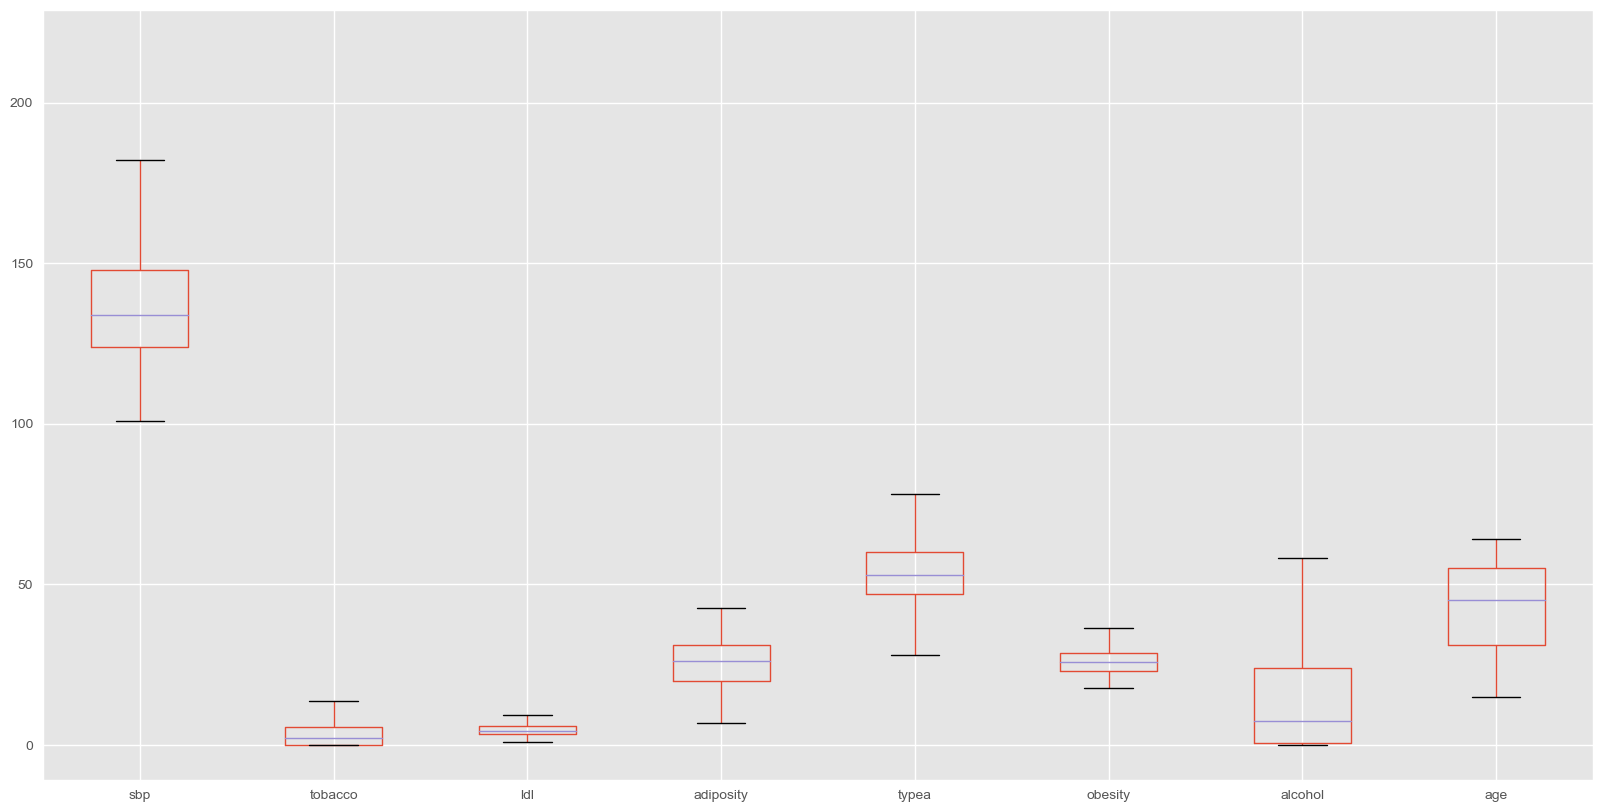

In [173]:
boxplots = datos.boxplot(return_type='axes')

 f) Graficos de densidad, histogramas y tests de normalidad
 **Densidad, Tabaco**

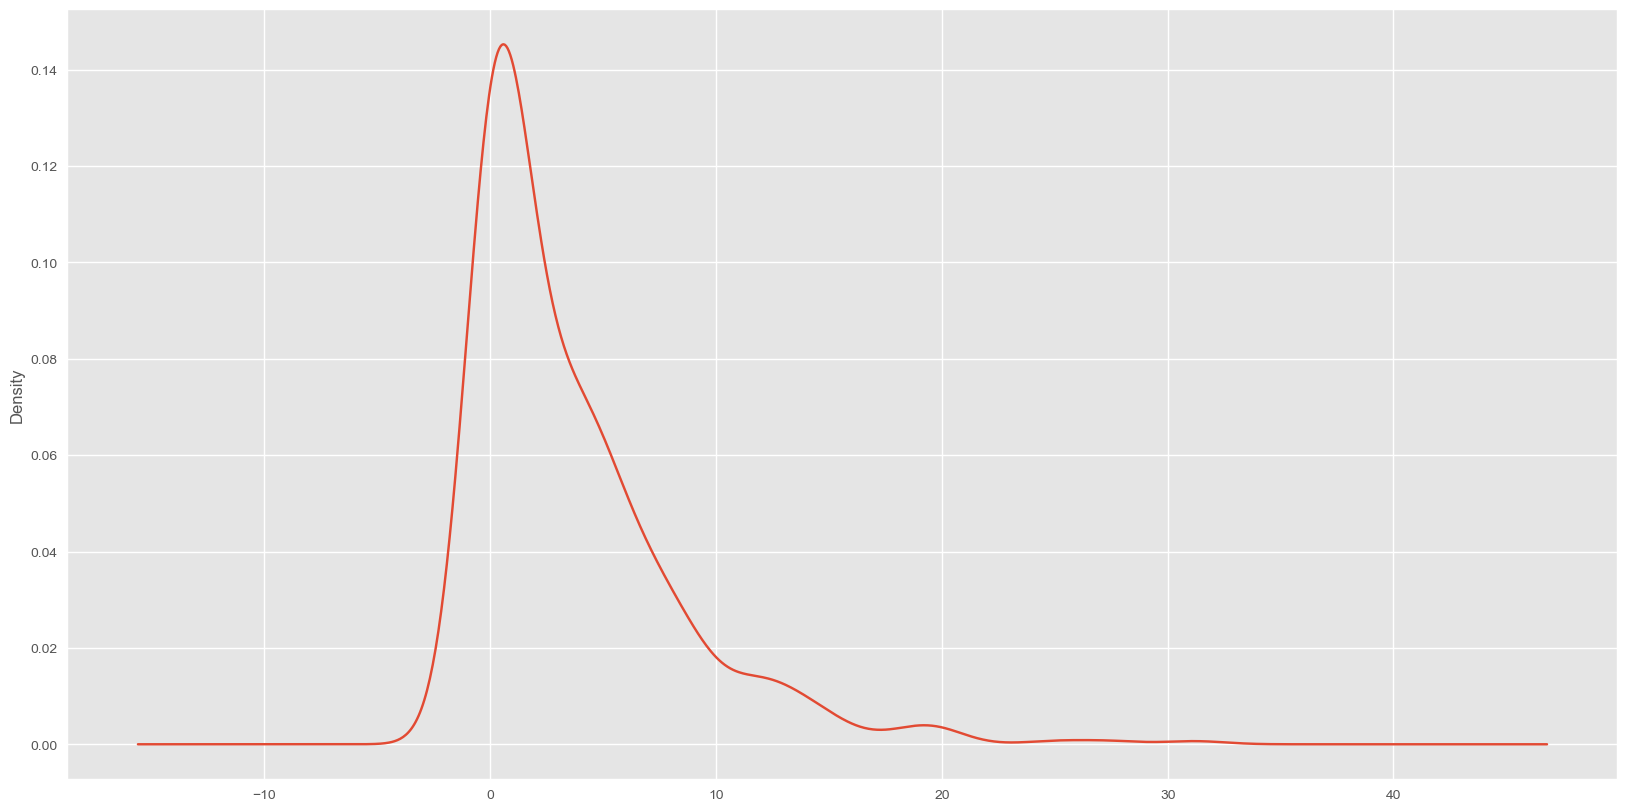

In [174]:
densidad = datos['tobacco'].plot(kind='density')

 **Densidad, alcohol**

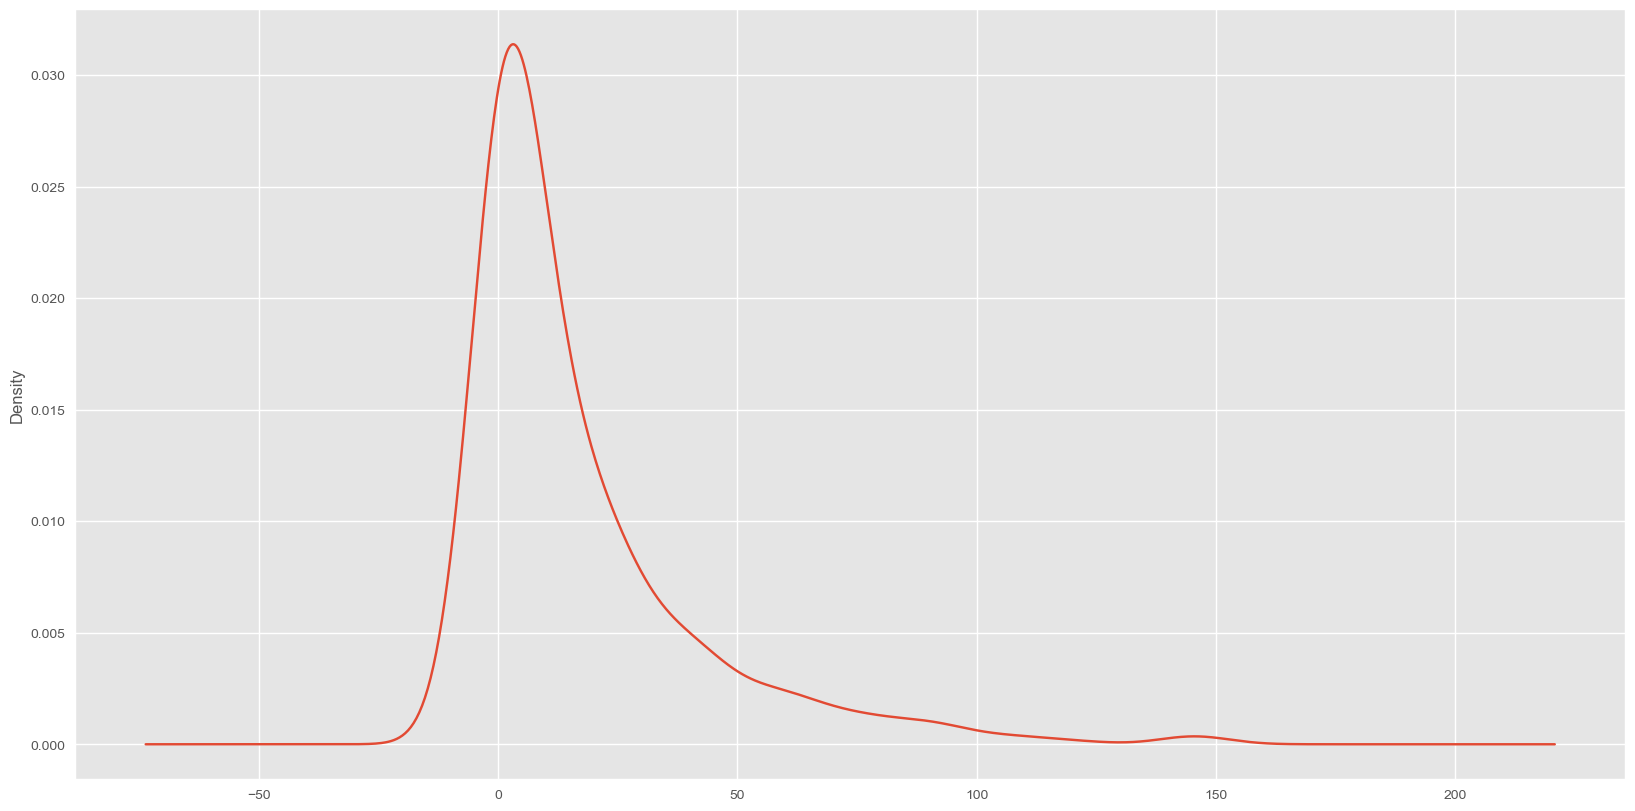

In [175]:
densidad = datos['alcohol'].plot(kind='density')


 **Histograma, Edad**

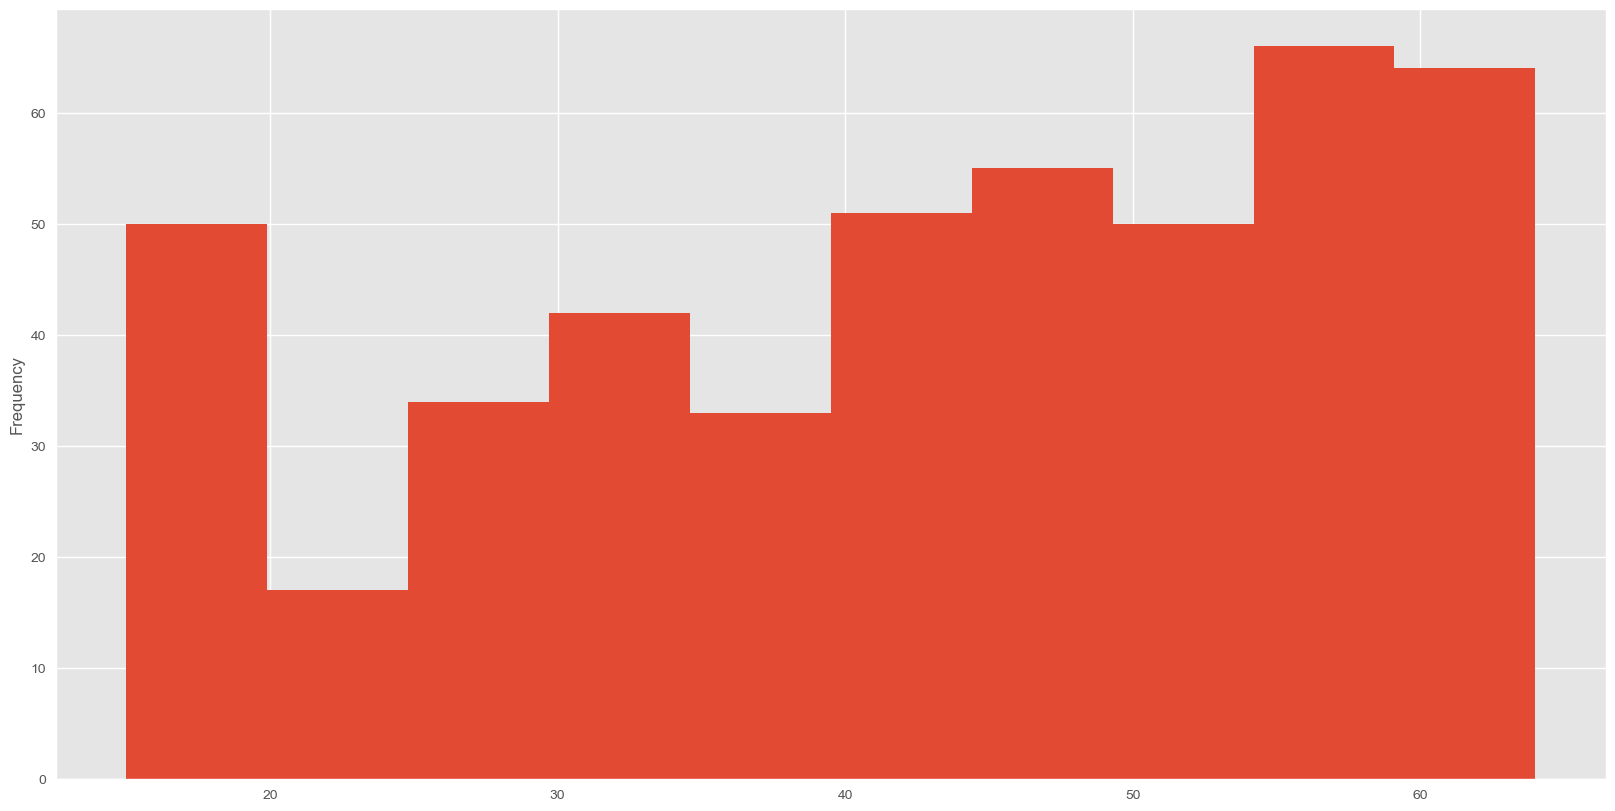

In [176]:
densidad = datos['age'].plot(kind='hist')


 **Histograma, Tarifa**

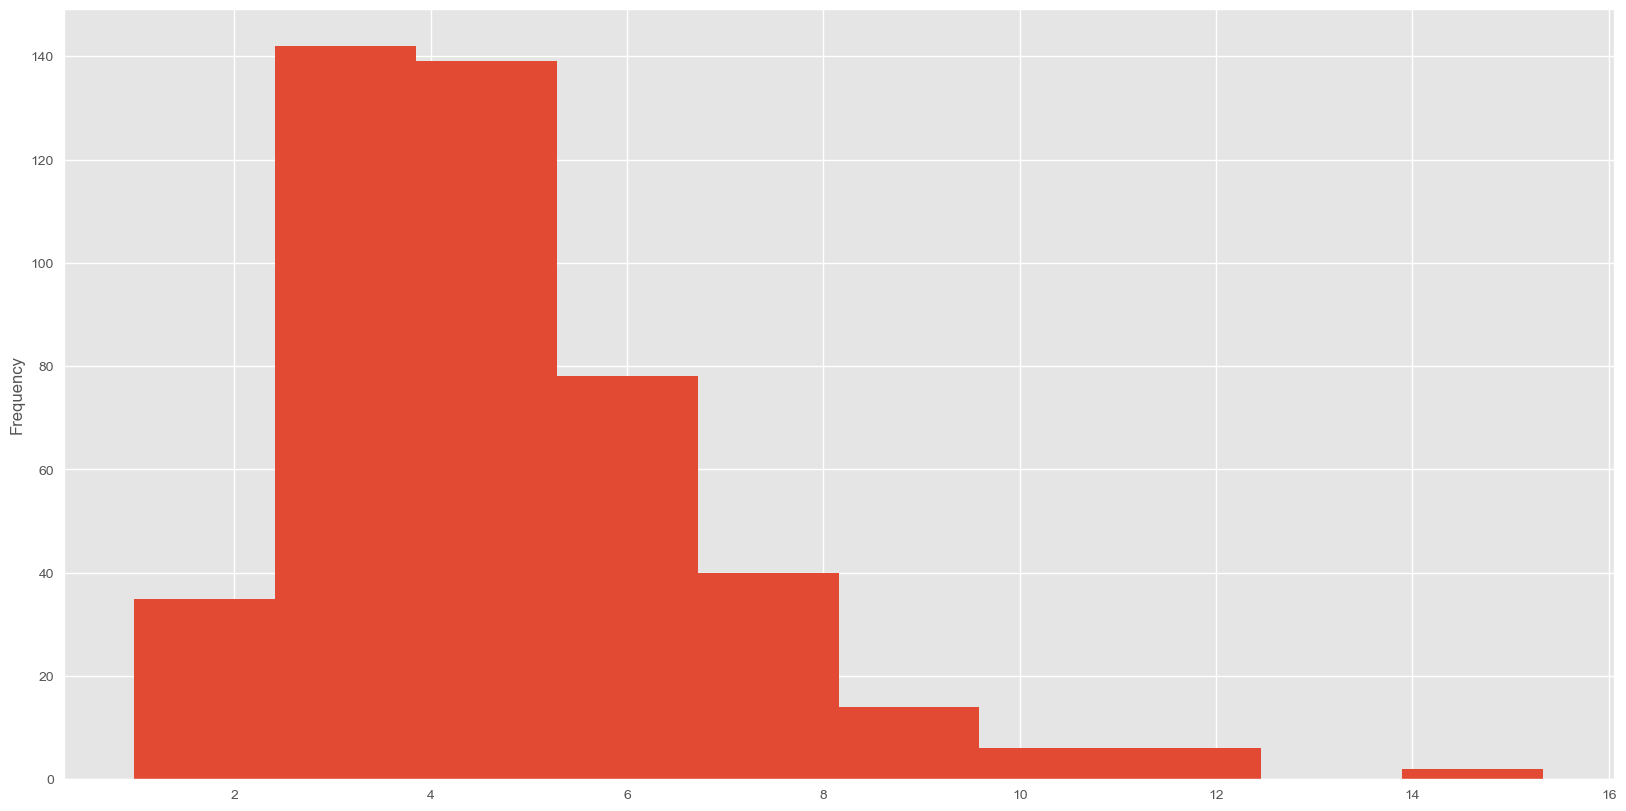

In [177]:
densidad = datos['ldl'].plot(kind='hist')


 ***Tests de Normalidad***

 ** Test de Shapiro-Wilk, SBP**

In [178]:
shapiro = scipy.stats.shapiro(datos.dropna()['sbp'])
print(shapiro)

(0.9230954647064209, 1.2528154308779661e-14)


In [179]:
Test_Estadistico = shapiro[0]
print(Test_Estadistico)

0.9230954647064209


In [180]:
p_value = shapiro[1]
print(p_value)

1.2528154308779661e-14


In [181]:
print(p_value < Test_Estadistico)


True


 ** Test de Shapiro-Wilk, Obesidad**

In [182]:
shapiro = scipy.stats.shapiro(datos.dropna()['obesity'])
print(shapiro)

(0.96074378490448, 9.225323838180088e-10)


In [183]:
Test_Estadistico = shapiro[0]
print(Test_Estadistico)

0.96074378490448


In [184]:
p_value = shapiro[1]
print(p_value)

9.225323838180088e-10


In [185]:
print(p_value < Test_Estadistico)


True


 g) Scatter plots y grafico de todas las variables 2 a 2
 ** Scatter plot Edad vs SBP, con historia familiar

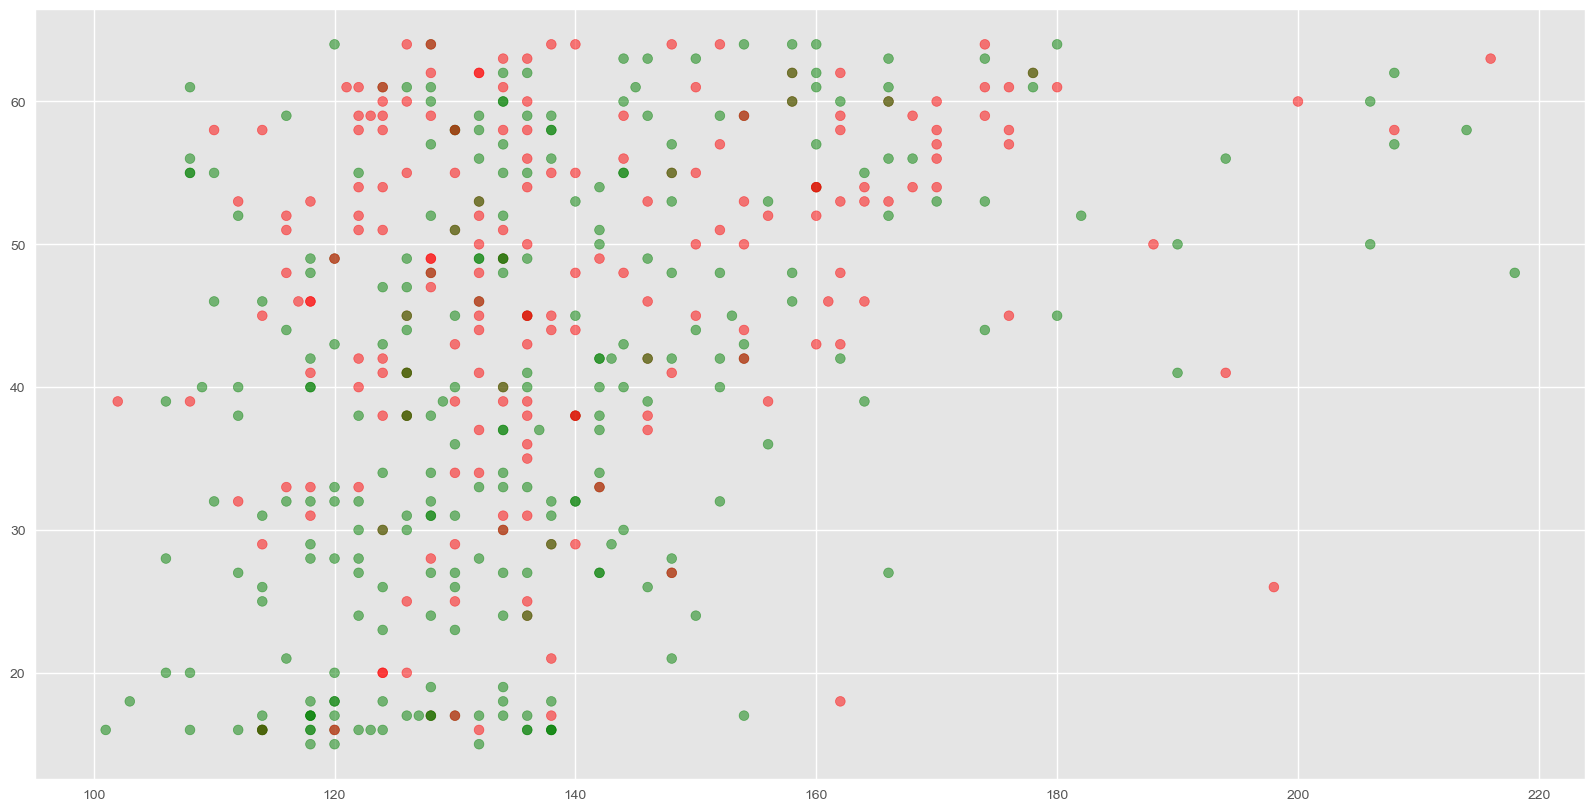

In [186]:
x = datos['sbp']
y = datos['age']
colores = recodificar(datos["famhist"], {"Present" : "red", "Absent": "green"})
plt.scatter(x, y, alpha=0.5, c=colores, cmap='viridis')



 ** Scatter plot Edad vs Parentezco

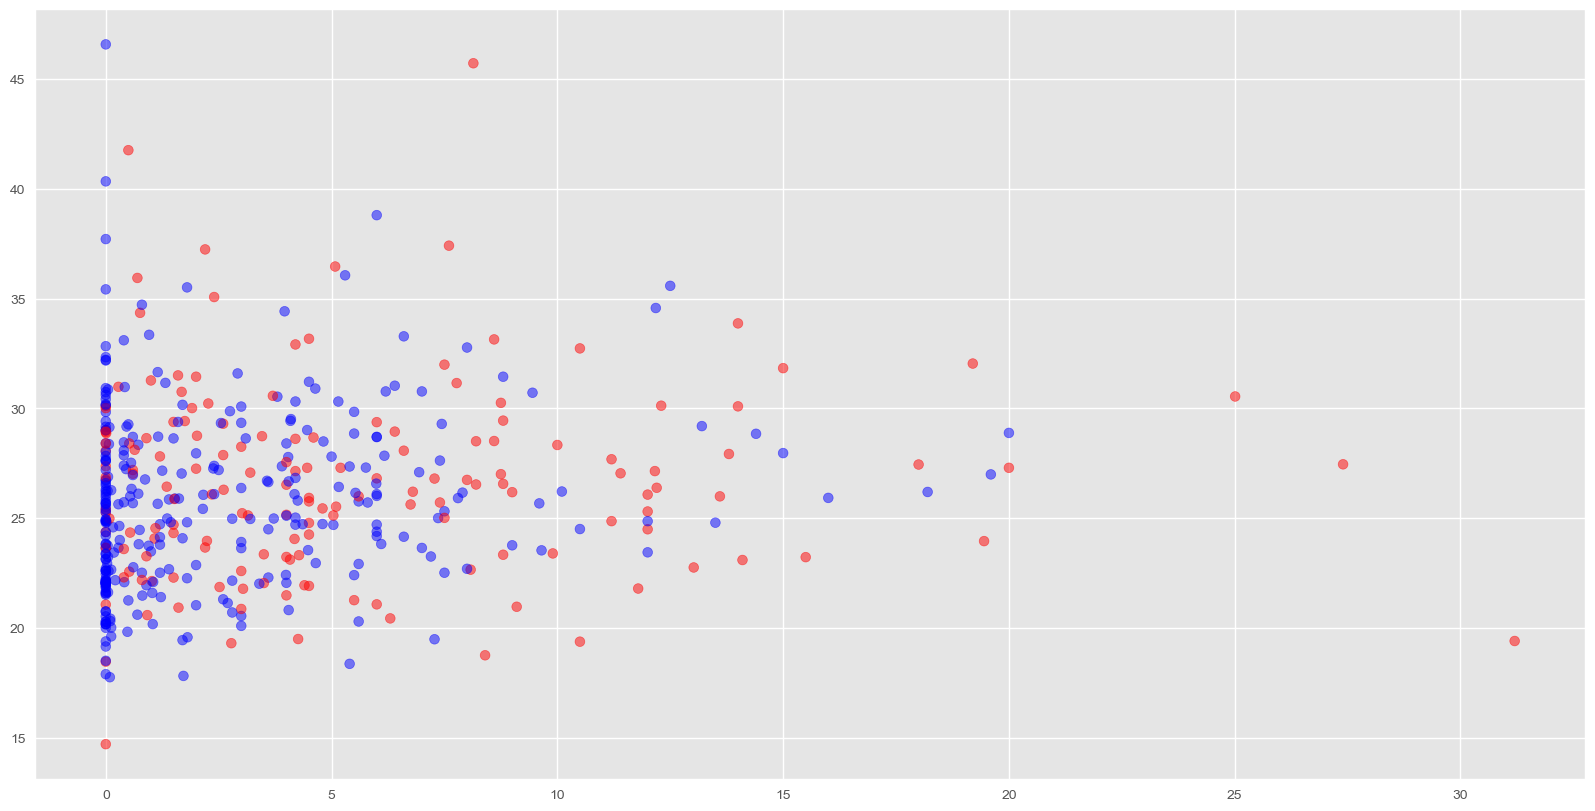

In [187]:
x = datos['tobacco']
y = datos['obesity']
colores = recodificar(datos["chd"], {"Si" : "red", "No" : "blue"})
plt.scatter(x, y,  alpha=0.5, c=colores, cmap='viridis')


 **  grafico de todas las variables 2 a 2

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


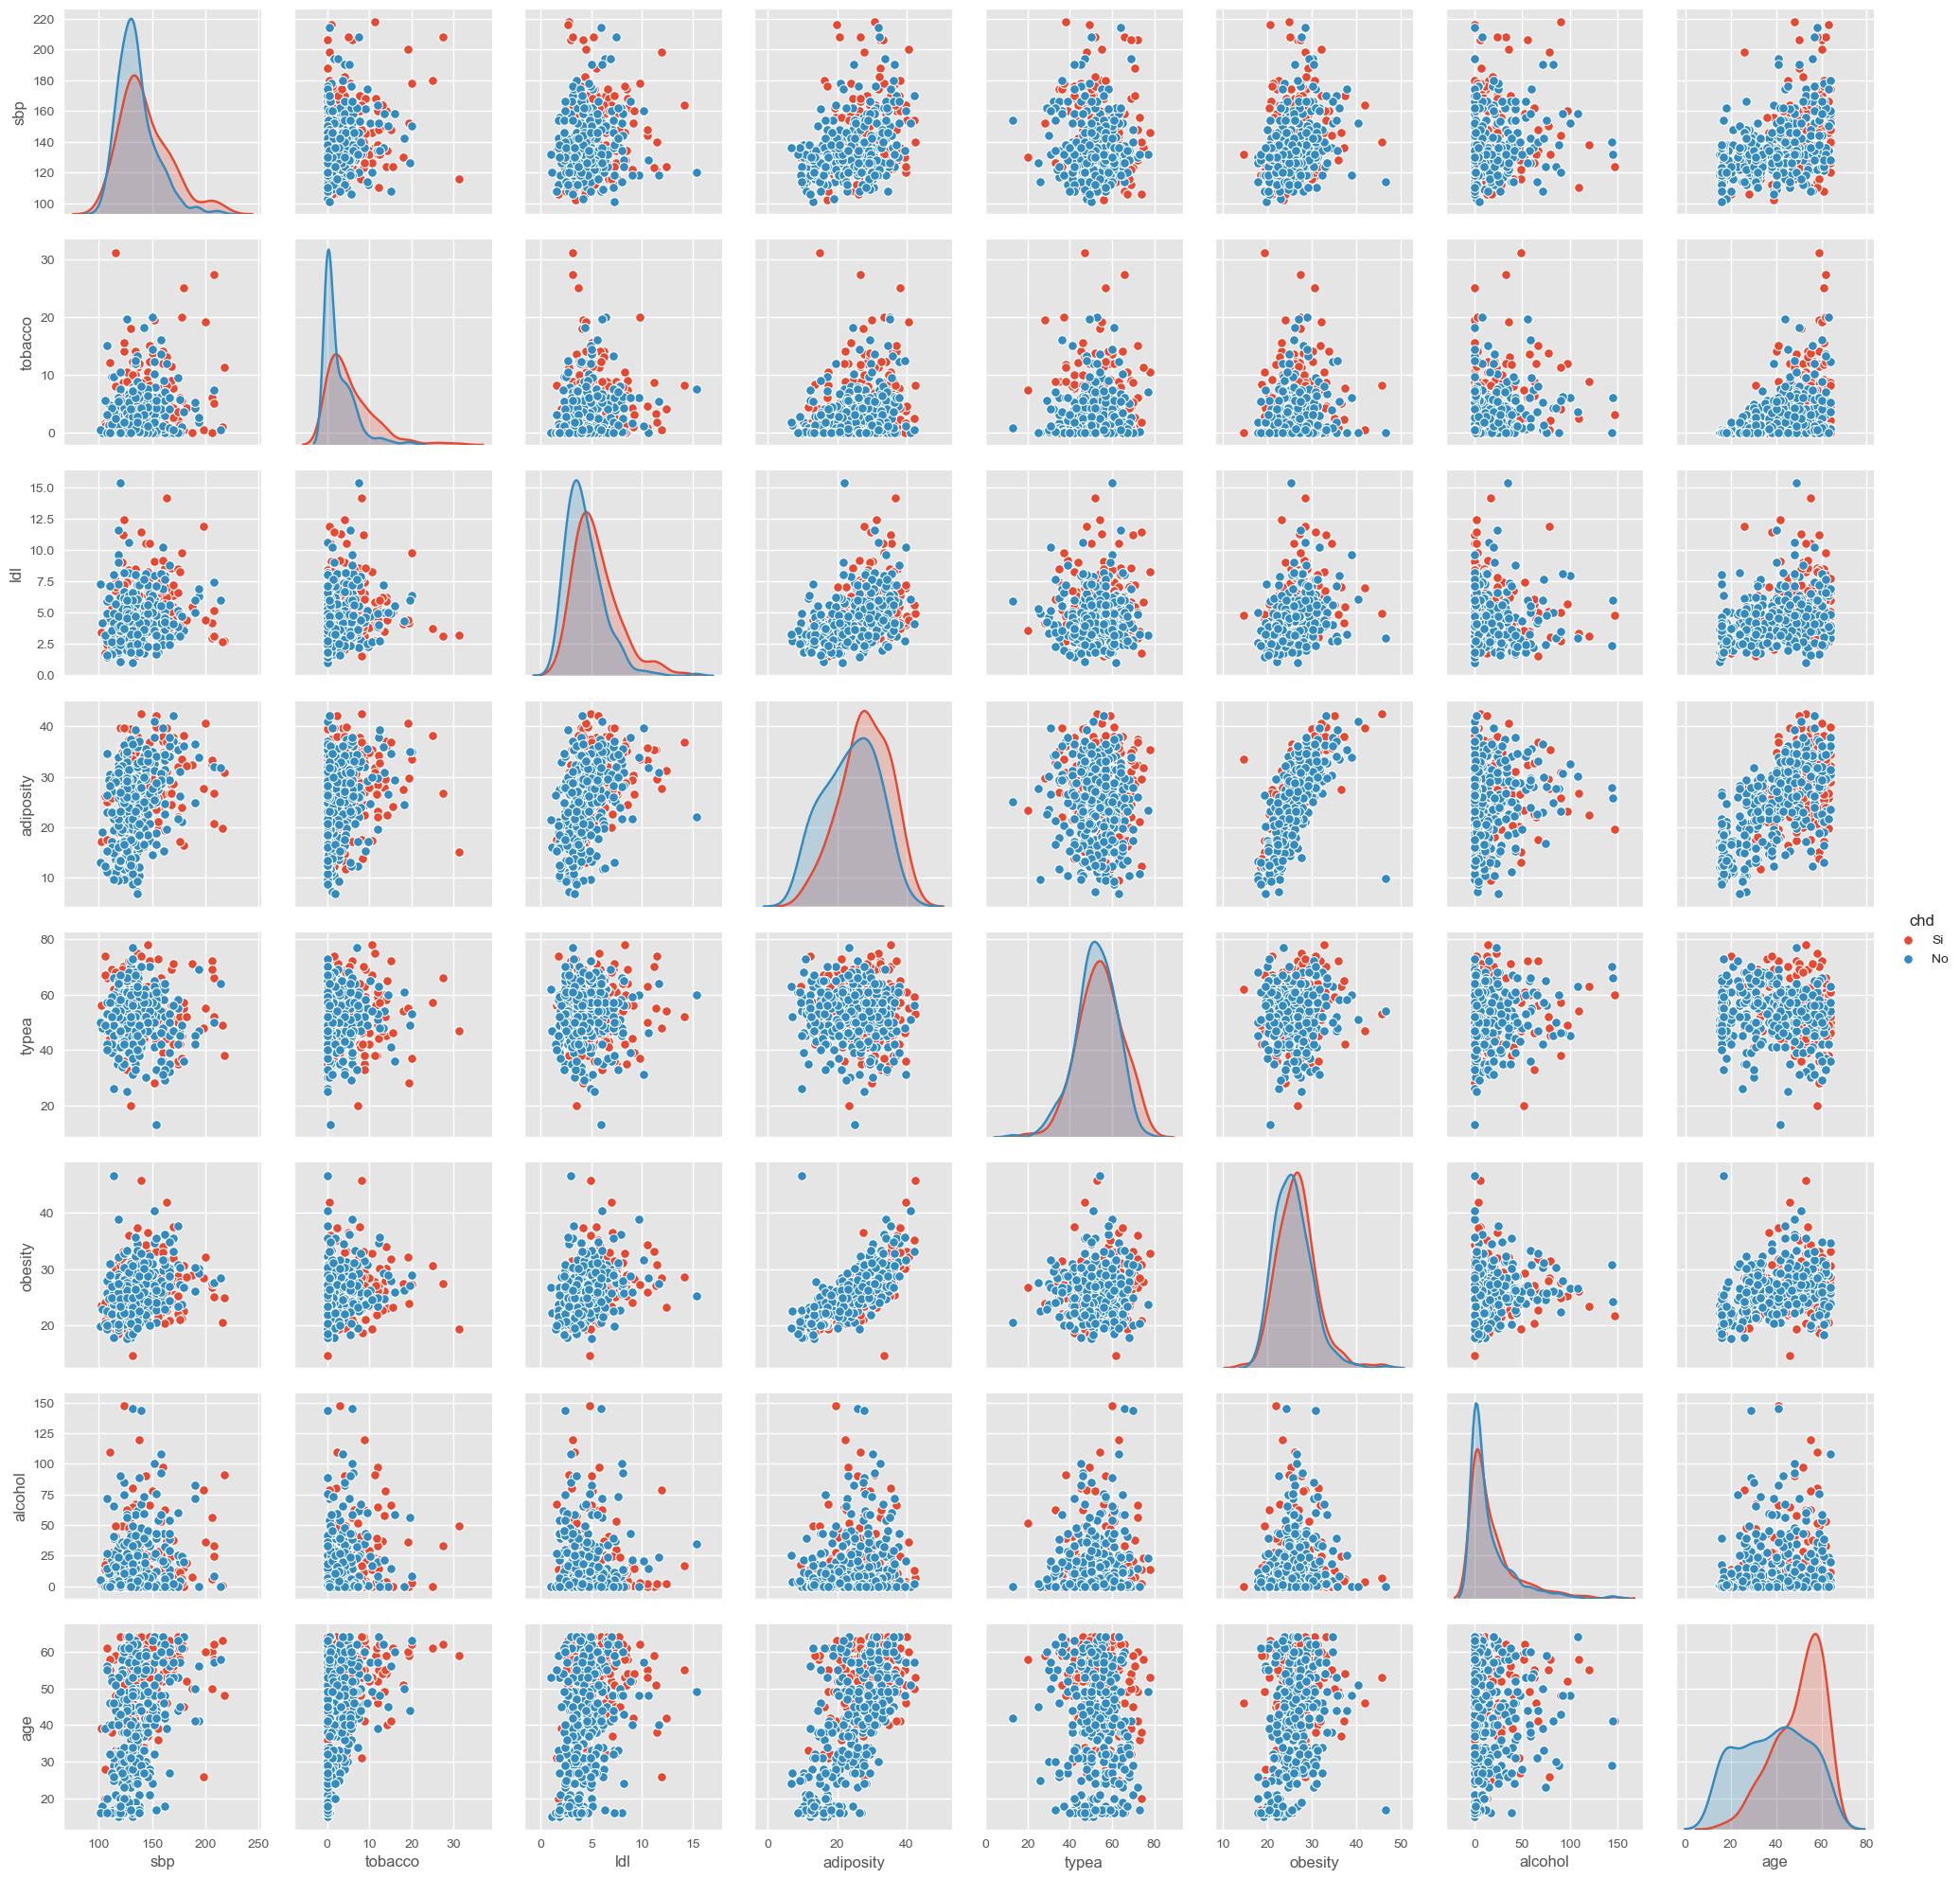

In [188]:
corr = sns.pairplot(datos, hue='chd', size=2.5)


 ** Matriz de correlaciones

In [189]:
corr = datos.corr()
print(corr)


                sbp   tobacco       ldl  adiposity     typea   obesity  \
sbp        1.000000  0.212247  0.158296   0.356500 -0.057454  0.238067   
tobacco    0.212247  1.000000  0.158905   0.286640 -0.014608  0.124529   
ldl        0.158296  0.158905  1.000000   0.440432  0.044048  0.330506   
adiposity  0.356500  0.286640  0.440432   1.000000 -0.043144  0.716556   
typea     -0.057454 -0.014608  0.044048  -0.043144  1.000000  0.074006   
obesity    0.238067  0.124529  0.330506   0.716556  0.074006  1.000000   
alcohol    0.140096  0.200813 -0.033403   0.100330  0.039498  0.051620   
age        0.388771  0.450330  0.311799   0.625954 -0.102606  0.291777   

            alcohol       age  
sbp        0.140096  0.388771  
tobacco    0.200813  0.450330  
ldl       -0.033403  0.311799  
adiposity  0.100330  0.625954  
typea      0.039498 -0.102606  
obesity    0.051620  0.291777  
alcohol    1.000000  0.101125  
age        0.101125  1.000000  


 ** Grafico de correlaciones

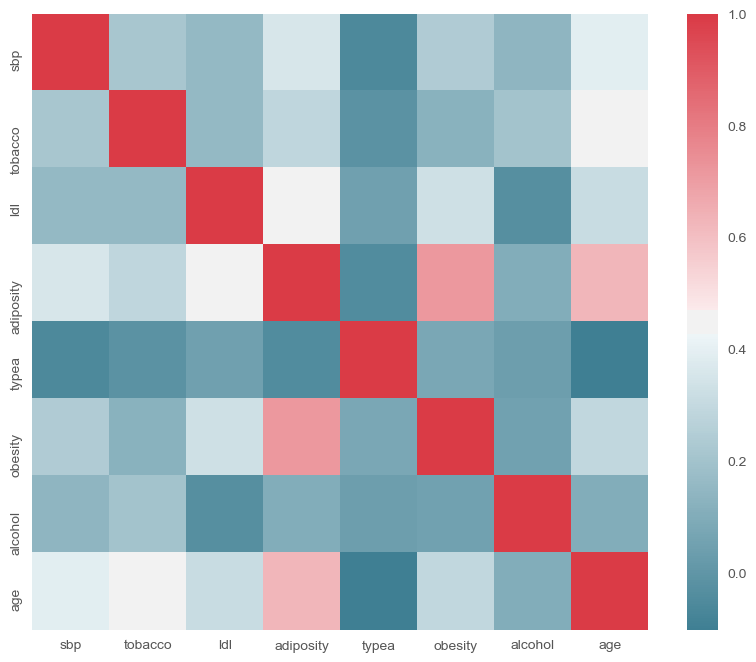

In [190]:
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)


 ### Ejercicio #3
 a) Efectuar ACP

In [191]:
def circulo(datos,eje1=0,eje2=1):
    corr = pca.column_correlations(datos)
    (fig, ax) = plt.subplots(figsize=(12, 12))
    # Ejes
    ax.arrow(0,0,0,1,color="b")   
    ax.arrow(0,0,1,0,color="b")
    ax.arrow(0,0,0,-1,color="b")
    ax.arrow(0,0,-1,0,color="b")
    for i in range(0, len(corr.values)):     
        ax.arrow(0,
                 0,  
                 corr.values[i, eje1]*0.95,  # 0 para PC1
                 corr.values[i, eje2]*0.95,  # 1 fpara PC2
                 head_width=0.05,
                 head_length=0.05)
        plt.text(corr.values[i, eje1] + 0.05,
                 corr.values[i, eje2] + 0.05,
                 corr.index.values[i])
        an = np.linspace(0, 2 * np.pi, 100)
        plt.plot(np.cos(an), np.sin(an),color="b")  # Agrega el círculo
        plt.axis('equal')
        ax.set_title('Círculo de Correlaciones')

In [192]:
datos = pd.read_csv('datos\\ImportacionesMexico.csv', delimiter=';', decimal=',', index_col=0)
datos.index = datos.index.astype(str)
plt.style.use('seaborn')

pca = prince.PCA(n_components=5)
pca = pca.fit(datos)

print(datos.head())

      Costa Rica  El Salvador  Guatemala  Honduras  Nicaragua  Panama
1979        44.4         27.2       45.6      20.0        6.0    14.1
1980        75.5         11.8       58.9      22.6       17.8    14.4
1981       110.7         50.6      128.3      17.2      119.4   118.5
1982        80.3         70.6      102.2      15.2      154.9   146.1
1983        81.6         82.3       89.0      35.1      169.4   127.1


In [193]:
print(datos.dtypes)


Costa Rica     float64
El Salvador    float64
Guatemala      float64
Honduras       float64
Nicaragua      float64
Panama         float64
dtype: object


 ** cosenos cuadrados

In [194]:

print(pca.row_coordinates(datos))



             0         1         2         3         4
1979  2.967255  0.718360  0.348803 -0.135764  0.488014
1980  2.777152 -0.261970 -0.625675 -0.875306  0.044973
1981 -0.476609 -2.193261  0.045855 -0.730020 -0.815416
1982 -0.876802 -1.758737  1.218268  0.290856  0.138631
1983 -1.560786 -0.948793 -0.230828  0.167495  1.290840
1984 -2.772856  1.297754 -1.051960 -0.644584  0.124058
1985 -1.240106  2.203384  1.355691 -0.392687 -0.345570
1986  1.183446  0.706493  0.131846  0.609913  0.061406
1987  0.112419  0.218681 -0.417791  0.884747 -0.417544
1988 -0.113112  0.018090 -0.774210  0.825350 -0.569392


 ** correlaciones de las variables con respecto a las componentes

In [195]:
print(pca.row_cosine_similarities(datos))

             0         1         2         3         4
1979  0.907794  0.053206  0.012544  0.001900  0.024555
1980  0.862621  0.007676  0.043784  0.085692  0.000226
1981  0.036418  0.771207  0.000337  0.085440  0.106598
1982  0.141063  0.567559  0.272330  0.015523  0.003526
1983  0.479173  0.177072  0.010481  0.005518  0.327756
1984  0.704716  0.154363  0.101428  0.038082  0.001411
1985  0.180834  0.570877  0.216114  0.018132  0.014042
1986  0.610838  0.217693  0.007582  0.162243  0.001645
1987  0.010601  0.040114  0.146418  0.656621  0.146245
1988  0.007908  0.000202  0.370473  0.421033  0.200384


 ** Valores Propios

In [196]:
print(pca.column_correlations(datos))

                    0         1         2         3         4
Costa Rica  -0.259603 -0.819336 -0.458202 -0.063951 -0.216528
El Salvador -0.905689  0.268323  0.047505  0.320147 -0.000710
Guatemala   -0.781024  0.330066  0.198680 -0.424906 -0.246965
Honduras    -0.610832  0.547044 -0.516730 -0.094025  0.226716
Nicaragua   -0.588392 -0.655416  0.213619 -0.175236  0.384471
Panama      -0.918253 -0.257679  0.120550  0.238551 -0.125200


In [197]:
print(pca.eigenvalues_)

[30.601737062202677, 16.474776186326956, 5.788548388903177, 3.8358399947909176, 3.227699402656057]


 *** Componentes principales
 En el plano principal, se pueden notar tres clusters, uno compuesto por 1984 y 1985, el segundo de 1979, 1980 y 1987,
 y el tercero por 1981, 1982 y 1983.

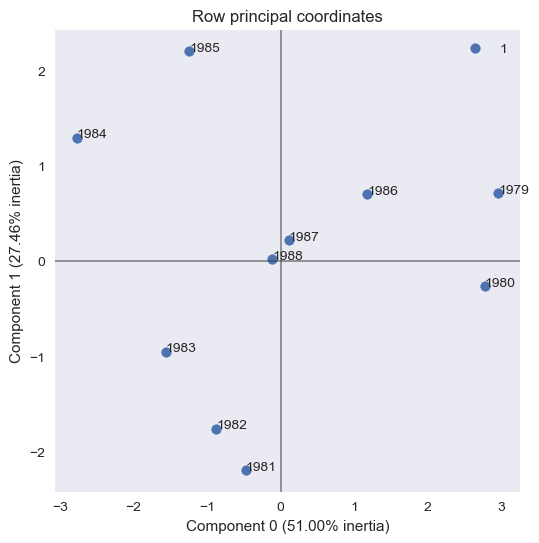

In [198]:
pca.plot_row_coordinates(datos,labels=datos.index,ellipse_fill=True)

 *** Circulo de correlaciones
 En el círculo de correlaciones, se puede deducir que existe correlación positiva entre
 los países de Honduras, Guatemala y El Salvador, que son los de la parte norte de Centroamérica.
 También se notar que hay correlación positiva entre Costa Rica, Nicaragua y Panamá
 Costa Rica y Nicaragua no poseen correlación entre El Salvador, Guatemala y Honduras, pues su ángulo
 tiende a noventa grados

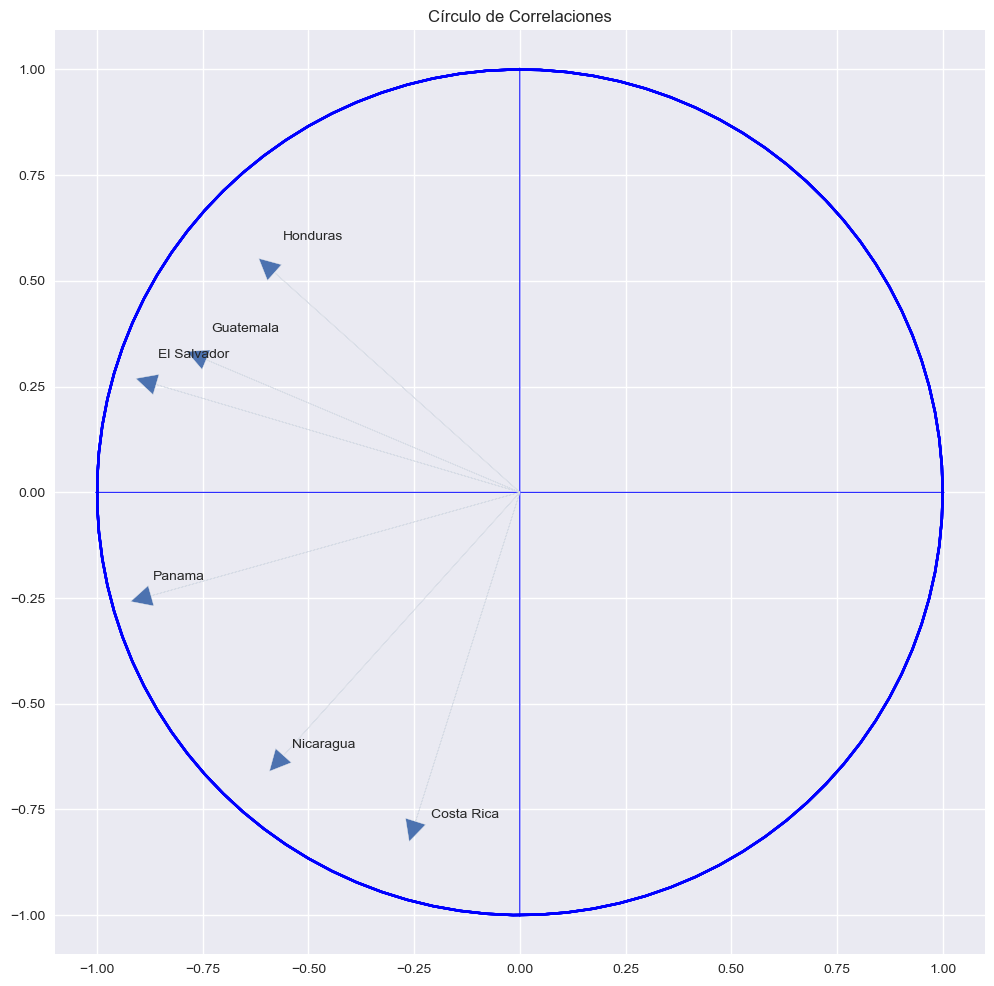

In [199]:
circulo(datos, 0, 1)

 Se puede decir que de 1981 a 1983, las importaciones de Costa Rica, Nicaragua y Panamá
 fueron altas; mientras que entre 1984 y 1985 los países que tuvieron altas importaciones
 fueron Honduras, Guatemala y El Salvador
 Los años 1979 y 1980 fueron de importaciones bajas para todos.

 *** Componentes 1 y 3

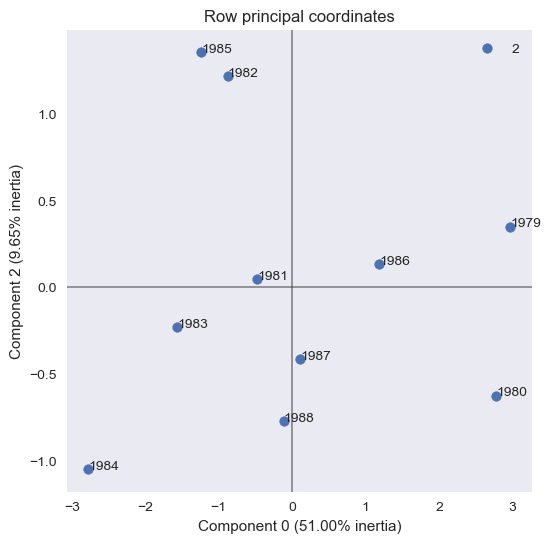

In [200]:
pca = prince.PCA(n_components=5)
pca = pca.fit(datos)
# Plotea el plano principal en "x_component=0, y_component=2"
pca.plot_row_coordinates(datos,x_component=0, y_component=2,labels=datos.index,ellipse_fill=True)


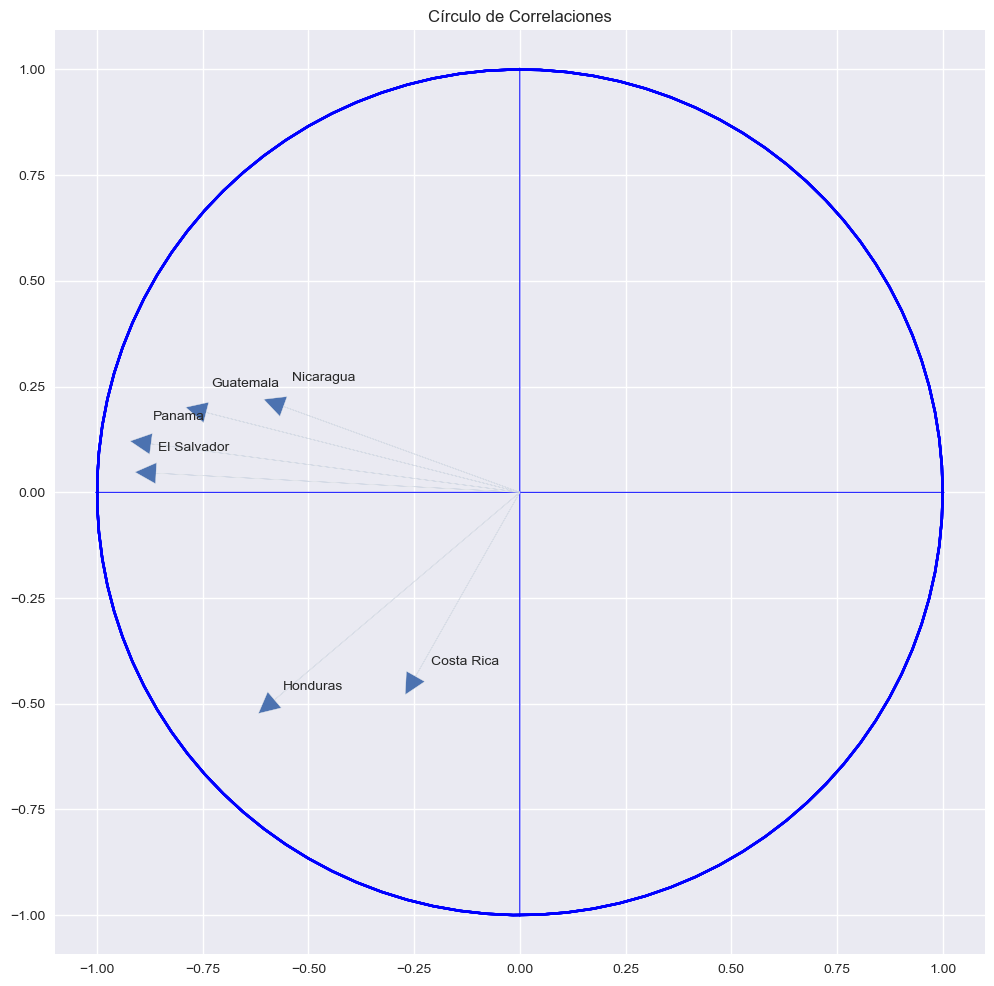

In [201]:
circulo(datos, 0, 2)

 En este análisis, se puede notar que aunque antes no estaban correlacionadas, Honduras y
 Costa Rica, tuvieron mayores importaciones en los años 1987 y 1988

 ### Ejercicio #4

In [202]:
datos = pd.read_csv('datos\\SAheart.csv', ";")

#Se quitan variables categoricas
del datos['famhist']
del datos['chd']

pca = prince.PCA(n_components=5)
pca = pca.fit(datos)

 ** cosenos cuadrados

In [203]:

print(pca.row_coordinates(datos))



            0         1         2         3         4
0    1.546465  3.058065  1.287760 -0.358979 -0.837978
1    0.851729 -0.698553 -0.393971 -0.262022  0.617005
2    0.032527 -1.044151 -0.338407 -0.499566 -0.575849
3    3.012672  0.025543 -0.119813 -0.441394  0.391777
4    0.933314  1.889090  1.568492  0.689628 -0.685408
5    1.582021 -1.113907  0.821286  0.364095 -0.461291
6   -1.511014  0.478787  0.150870  0.782390  1.044075
7   -1.002724  0.036464  0.434216  1.541818 -0.049752
8   -1.814752 -0.619263 -0.491126 -0.097774 -0.583581
9    0.800634 -1.837450  0.915016  0.209760  0.405561
10   2.203193  1.651824  2.039134 -1.049007  2.704093
11  -0.110720  0.637585  0.852449  2.250299  0.465431
12  -3.443329 -0.200241  0.382125  0.154847  0.384376
13  -2.562659 -0.116485 -0.444444 -0.699970  0.334276
14  -0.985478  0.903030 -0.173633  1.660085 -0.288077
15  -0.429235  0.726731 -1.275532 -1.018159 -1.403565
16   1.650123 -1.269386  0.941441  2.433608 -1.861114
17   2.744961 -1.363853  2.1

 ** correlaciones de las variables con respecto a las componentes

In [204]:
print(pca.row_cosine_similarities(datos))

            0             1         2             3         4
0    0.168032  6.570609e-01  0.116515  9.054221e-03  0.049338
1    0.399037  2.684165e-01  0.085376  3.776478e-02  0.209405
2    0.000592  6.101027e-01  0.064085  1.396567e-01  0.185564
3    0.961510  6.911669e-05  0.001521  2.063966e-02  0.016260
4    0.111032  4.548803e-01  0.313586  6.062081e-02  0.059881
5    0.525416  2.604812e-01  0.141601  2.782974e-02  0.044671
6    0.538814  5.409860e-02  0.005372  1.444603e-01  0.257256
7    0.281246  3.719320e-04  0.052739  6.649503e-01  0.000692
8    0.771606  8.984843e-02  0.056513  2.239808e-03  0.079793
9    0.126608  6.668464e-01  0.165368  8.690378e-03  0.032487
10   0.240858  1.353891e-01  0.206323  5.460259e-02  0.362827
11   0.001908  6.326184e-02  0.113084  7.880350e-01  0.033711
12   0.970703  3.282719e-03  0.011955  1.963075e-03  0.012096
13   0.889865  1.838578e-03  0.026766  6.638987e-02  0.015141
14   0.208600  1.751557e-01  0.006476  5.919436e-01  0.017825
15   0.0

 ** Valores Propios

In [205]:
print(pca.column_correlations(datos))

                  0         1         2         3         4
adiposity  0.884739 -0.205047 -0.035399 -0.145447 -0.108441
age        0.777576  0.211293 -0.162995  0.221421  0.076452
alcohol    0.201734  0.593915  0.518711 -0.395068 -0.351028
ldl        0.565246 -0.398174 -0.014828  0.279965 -0.196754
obesity    0.692035 -0.428584  0.124006 -0.342812 -0.139571
sbp        0.559371  0.260989 -0.072668 -0.276057  0.676795
tobacco    0.518998  0.501749  0.099008  0.538656 -0.098105
typea     -0.040651 -0.309214  0.854934  0.244625  0.308784


In [206]:
print(pca.eigenvalues_)

[1298.4075480280615, 553.0747278741159, 489.01559045152607, 391.94265303988084, 352.0625190844631]


 *** Componentes principales
 Se hace dificil denotar clusters a simple vista, sin embargo si se ve en cuadrantes y
 comparandolo con el círculo de correlaciones, en el cuadrante superior derecho se tiene
 se determina que las variables definidas por alcohol y tabaco están positivamente correlacionadas
 con el sbp (presión sistólica) y la edad.
 Así como el ldl está fuerte y positivamente ligado a la obesidad, también existe correlación
 con la adiposidad
 La personalidad tipo A, se podría decir que es inversamente correlacionao con el alcohol,
 sin embargo tiene una muestra representativa baja

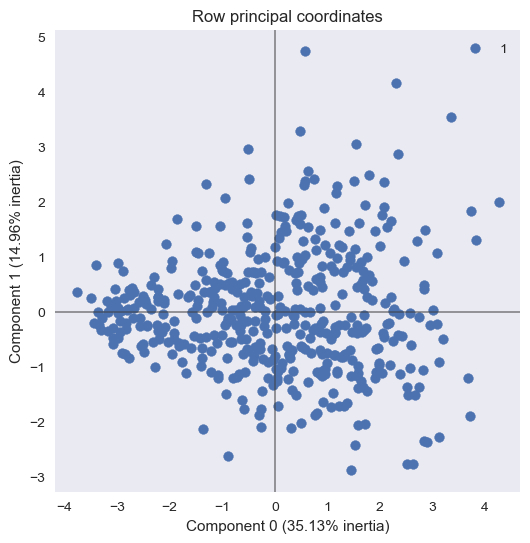

In [207]:

pca.plot_row_coordinates(datos,ellipse_fill=True)

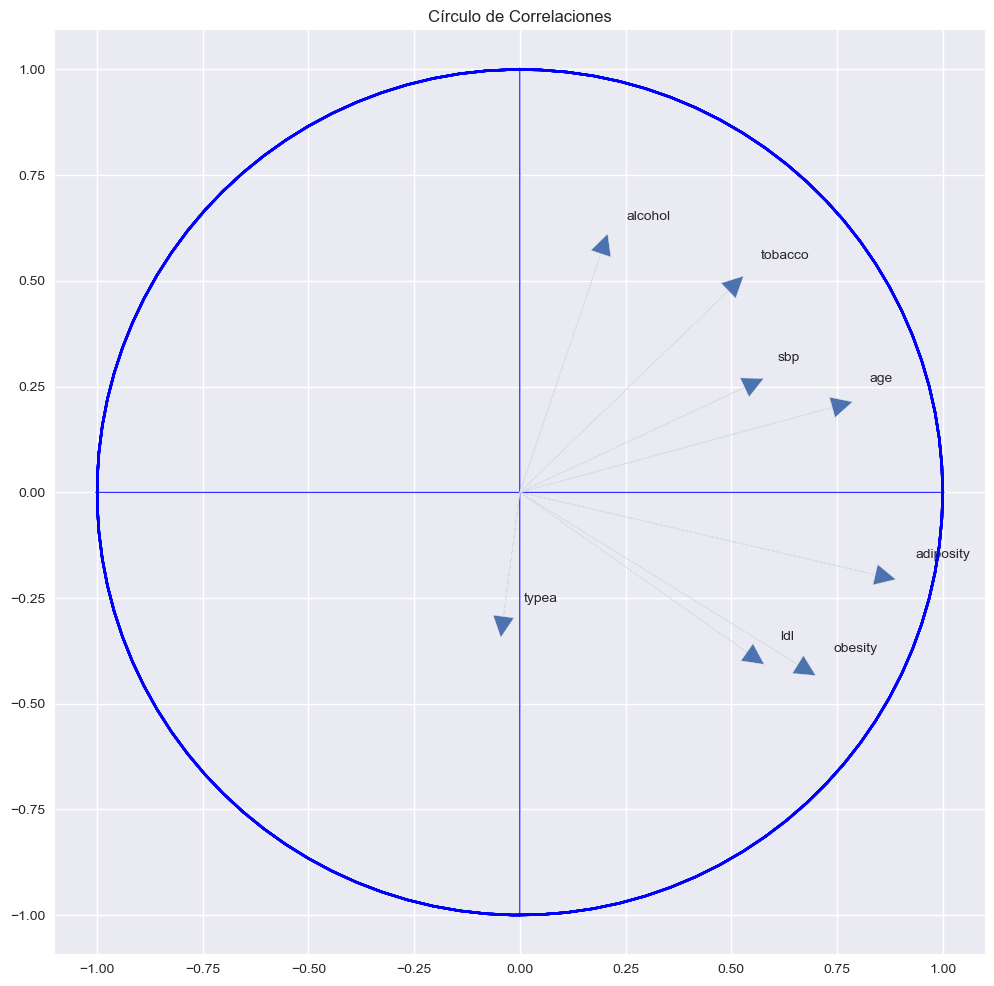

In [208]:
circulo(datos, 0, 1)


 *** ACP con variables categoricas

In [209]:
datos = pd.read_csv('datos\\SAheart.csv', ";")


In [210]:
datos_dummy = pd.get_dummies(datos)
print(datos_dummy.head())

   sbp  tobacco   ldl  adiposity  typea  obesity  alcohol  age  \
0  160    12.00  5.73      23.11     49    25.30    97.20   52   
1  144     0.01  4.41      28.61     55    28.87     2.06   63   
2  118     0.08  3.48      32.28     52    29.14     3.81   46   
3  170     7.50  6.41      38.03     51    31.99    24.26   58   
4  134    13.60  3.50      27.78     60    25.99    57.34   49   

   famhist_Absent  famhist_Present  chd_No  chd_Si  
0               0                1       0       1  
1               1                0       0       1  
2               0                1       1       0  
3               0                1       0       1  
4               0                1       0       1  


In [211]:
print(datos_dummy.dtypes)

sbp                  int64
tobacco            float64
ldl                float64
adiposity          float64
typea                int64
obesity            float64
alcohol            float64
age                  int64
famhist_Absent       uint8
famhist_Present      uint8
chd_No               uint8
chd_Si               uint8
dtype: object


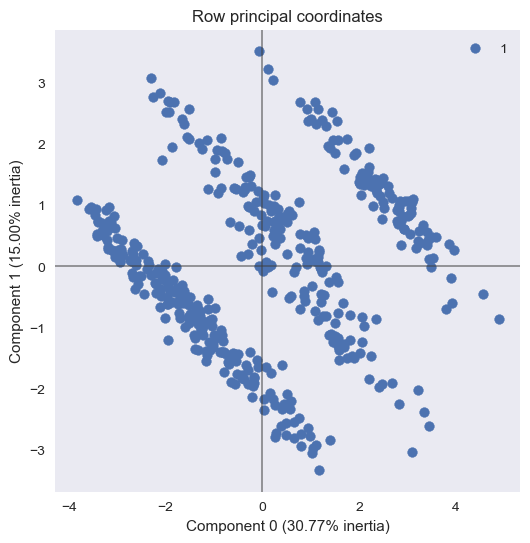

In [212]:
pca = prince.PCA(n_components=5)
pca = pca.fit(datos_dummy)
# Plotea el plano principal
pca.plot_row_coordinates(datos_dummy,ellipse_fill=True)

 ** cosenos cuadrados

In [213]:
print(pca.row_coordinates(datos_dummy))


            0         1         2         3         4
0    2.940623  1.067747  0.882341  2.764364  1.361380
1    1.149217 -0.877976  1.534530 -1.030984 -0.505510
2    0.092612  0.750399 -2.174114 -0.484489 -0.266488
3    3.902101 -0.187900 -0.333255  0.090669 -0.123045
4    2.491633  1.438940  0.981566  1.448739  1.417990
5    1.325404 -0.001168 -2.165331 -0.721503  0.822105
6   -2.072262 -0.080166  0.727445  0.257058  0.096850
7    1.090933  2.683534  1.135376 -0.496919 -0.104773
8   -1.255273  1.914842 -1.497562 -0.254139 -0.553895
9    2.314162  1.340539 -0.071055 -2.038327  0.535671
10   2.244267 -1.463736  2.048266  1.077068  2.181682
11   1.754989  2.086409  1.381776 -0.020911  0.337576
12  -3.586613  0.944217  0.766490 -0.408648  0.297648
13  -3.023969  0.174064  0.276473 -0.051744 -0.322339
14  -0.494317  1.712892 -0.788575  0.966805 -0.336534
15  -0.275088  0.966115 -1.882832  1.383933 -1.007774
16   0.414359 -1.618900 -0.074618 -1.503971  0.661455
17   3.850106  0.359477  0.0

 ** correlaciones de las variables con respecto a las componentes

In [214]:
print(pca.row_cosine_similarities(datos_dummy))

            0             1         2         3         4
0    0.431050  5.683100e-02  0.038808  0.380925  0.092386
1    0.229098  1.337155e-01  0.408476  0.184383  0.044328
2    0.001530  1.004782e-01  0.843435  0.041885  0.012672
3    0.988976  2.293213e-03  0.007213  0.000534  0.000983
4    0.464974  1.550764e-01  0.072161  0.157196  0.150594
5    0.229881  1.785015e-07  0.613556  0.068121  0.088442
6    0.875429  1.310110e-03  0.107878  0.013471  0.001912
7    0.119750  7.245936e-01  0.129706  0.024846  0.001105
8    0.200564  4.667043e-01  0.285460  0.008221  0.039051
9    0.461701  1.549289e-01  0.000435  0.358196  0.024738
10   0.291234  1.238849e-01  0.242586  0.067078  0.275217
11   0.325690  4.603151e-01  0.201898  0.000046  0.012050
12   0.881176  6.107137e-02  0.040245  0.011439  0.006069
13   0.977204  3.237776e-03  0.008168  0.000286  0.011103
14   0.050400  6.051774e-01  0.128265  0.192797  0.023360
15   0.010110  1.247000e-01  0.473622  0.255882  0.135686
16   0.031231 

 ** Valores Propios

In [215]:
print(pca.column_correlations(datos_dummy))

                        0         1         2         3         4
adiposity        0.718576 -0.484286 -0.282438 -0.121034  0.011270
age              0.732097 -0.265137 -0.009741  0.207162 -0.170763
alcohol          0.185178 -0.032060  0.012992  0.595308  0.611436
chd_No          -0.708662 -0.257774 -0.602669  0.142165  0.065266
chd_Si           0.708662  0.257774  0.602669 -0.142165 -0.065266
famhist_Absent  -0.552816 -0.684259  0.464881 -0.077135  0.025855
famhist_Present  0.552816  0.684259 -0.464881  0.077135 -0.025855
ldl              0.523874 -0.205533 -0.101994 -0.408730 -0.078000
obesity          0.503681 -0.463500 -0.393590 -0.313450  0.191503
sbp              0.460569 -0.320467 -0.027961  0.290386 -0.009813
tobacco          0.497291 -0.187220  0.253983  0.402334  0.077637
typea            0.045903  0.173860  0.125069 -0.447364  0.764618


In [216]:
print(pca.eigenvalues_)

[1705.6542715013525, 831.7055192723479, 686.0379224604379, 543.2752224542699, 483.4921234549648]


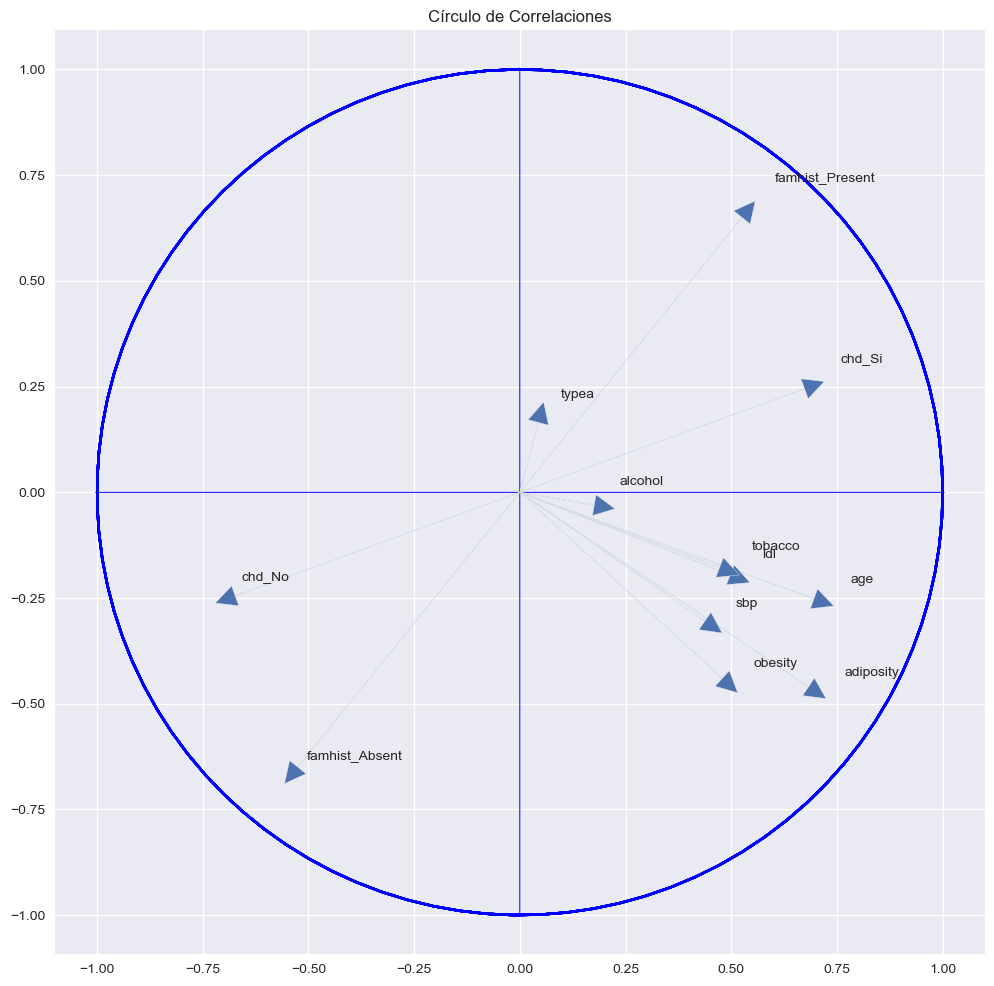

In [217]:
circulo(datos_dummy)

 Se denota que la historia familiar(familyhist) y el tener una enfermedad coronaria(chd),
 estan fuerte y positivamente corelacionados.
 Al mismo tiempo estas variables no tienen relacion con el alcohol o el tabaco ni la obesidad
 pues como se puede ver tienen un angulo cercano a los noventa grados


 c) ¿Cu´al de los an´alisis anteriores le parece m´as interesante? ¿Porqu´e?
 el analisis por medio del plano principal y el circulo de correlaciones, pues permite ver
 comportamientos entre las varialbes que pueden ser abstractos o tener relacion unas con otras.

In [ ]:
El analisis por medio del plano principal y el circulo de correlaciones, pues permite ver comportamientos entre las varialbes
que pueden ser abstractos o tener relacion unas con otras.